<a href="https://www.kaggle.com/code/nebyubelay/pneumonia-detection-acc-98?scriptVersionId=242100579" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest_xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg
/kaggle/input/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
/kaggle/input/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
/kaggle/input/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

2025-05-27 07:17:49.909297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748330270.090353      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748330270.147016      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 📦 Imports – Library Overview
### 📚 Explanation

This block imports all the essential libraries required for building and training a pneumonia detection deep learning model:

- **TensorFlow and Keras modules:**  
  Used to build, compile, and train deep learning models, as well as to load pretrained architectures like `EfficientNetB0`.

- **`cv2` (OpenCV):**  
  Enables advanced image preprocessing techniques such as denoising, CLAHE (Contrast Limited Adaptive Histogram Equalization), and resizing.

- **`matplotlib` and `numpy`:**  
  - `matplotlib.pyplot` is used for plotting graphs and displaying images.  
  - `numpy` is used for efficient numerical computations and image array manipulation.

- **`os`:**  
  Helps interact with the operating system's file structure (e.g., reading directories, joining paths).
```

In [3]:
# Define paths
train_dir = '/kaggle/input/chest_xray/train'
val_dir = '/kaggle/input/chest_xray/val'
test_dir = '/kaggle/input/chest_xray/test'

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

## 📁 Dataset Paths and Basic Configuration
### 🔍 Explanation

- **Dataset paths:**  
  These variables (`train_dir`, `val_dir`, `test_dir`) define the locations of the training, validation, and test datasets on disk. Each folder contains two subfolders: `NORMAL` and `PNEUMONIA`.

- **Image configuration:**  
  The target image size is set to `224x224` pixels, a common size for pretrained CNNs (e.g., ResNet, EfficientNet). The `batch_size` determines how many images are processed in a single training step.

---

## 📊 Dataset Analysis Function

```python
def analyze_dataset(directory, title="Dataset Analysis"):
    ...
```

### 🧠 Explanation

This function helps analyze and visualize a dataset directory by:

1. **Counting Class Distribution**
   - Automatically detects class folders.
   - Counts how many images exist for each class (e.g., `NORMAL`, `PNEUMONIA`).

2. **Visual Output**
   - Prints a summary of the dataset: total classes, class names, and counts.
   - Shows a bar chart of class distribution with percentages.
   
3. **Sample Visualization**
   - Loads a few sample images from each class using `ImageDataGenerator`.
   - Displays 5 sample images in a single row with their class names.

---

## 📈 Running Dataset Analysis on All Sets

```python
analyze_dataset(train_dir, "Training Set")
analyze_dataset(val_dir, "Validation Set")
analyze_dataset(test_dir, "Test Set")
```

### 🗂️ Explanation

- These lines call the `analyze_dataset()` function for the training, validation, and test sets.
- The purpose is to:
  - Ensure the data is loaded correctly.
  - Confirm that each split has a reasonable and balanced class distribution.
  - Quickly visualize what the images look like after preprocessing (resizing and normalization).
```


                   TRAINING SET                   
Dataset directory: /kaggle/input/chest_xray/train
Total number of classes: 2
Classes: ['NORMAL', 'PNEUMONIA']

      Class Distribution      
------------------------------
NORMAL         : 1341 (25.7%)
PNEUMONIA      : 3875 (74.3%)


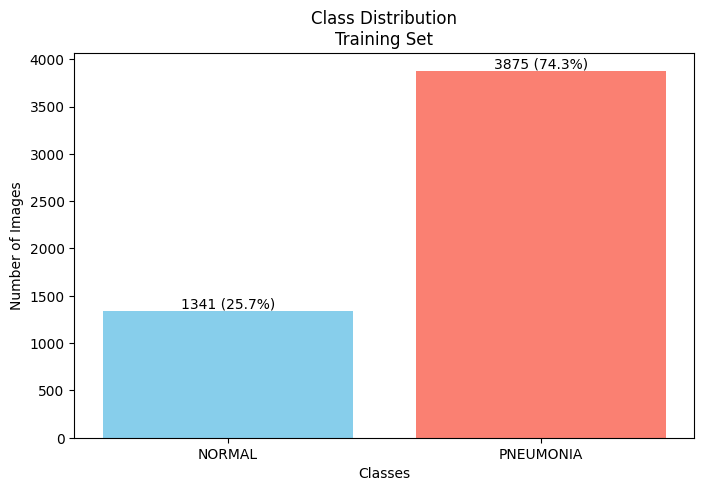


Sample images from each class:
Found 5216 images belonging to 2 classes.


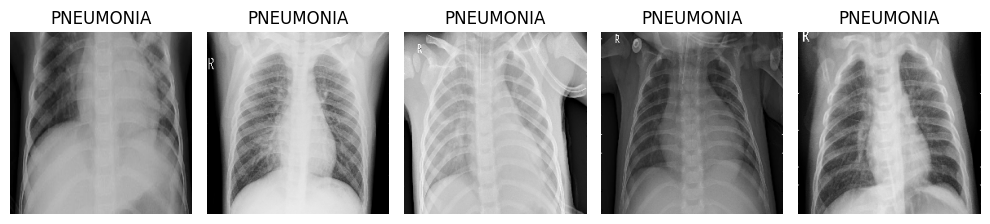


                  VALIDATION SET                  
Dataset directory: /kaggle/input/chest_xray/val
Total number of classes: 2
Classes: ['NORMAL', 'PNEUMONIA']

      Class Distribution      
------------------------------
NORMAL         :    8 (50.0%)
PNEUMONIA      :    8 (50.0%)


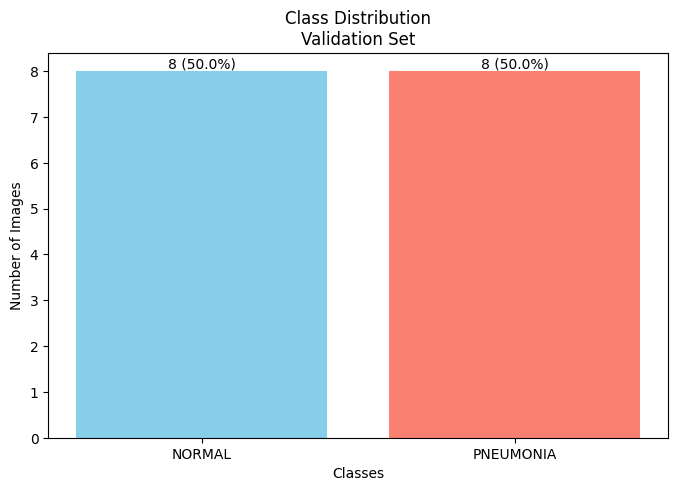


Sample images from each class:
Found 16 images belonging to 2 classes.


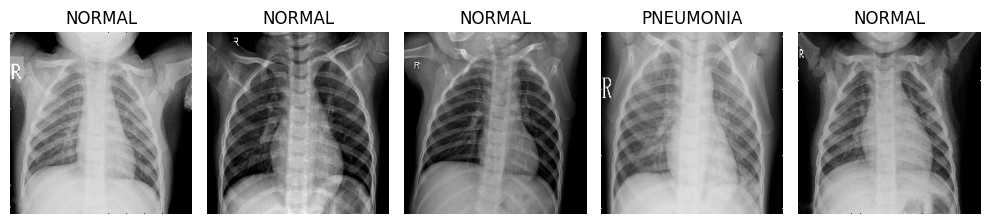


                     TEST SET                     
Dataset directory: /kaggle/input/chest_xray/test
Total number of classes: 2
Classes: ['NORMAL', 'PNEUMONIA']

      Class Distribution      
------------------------------
NORMAL         :  234 (37.5%)
PNEUMONIA      :  390 (62.5%)


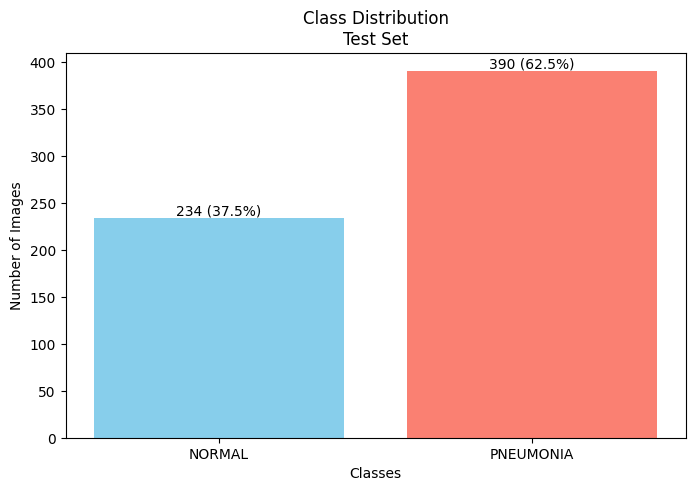


Sample images from each class:
Found 624 images belonging to 2 classes.


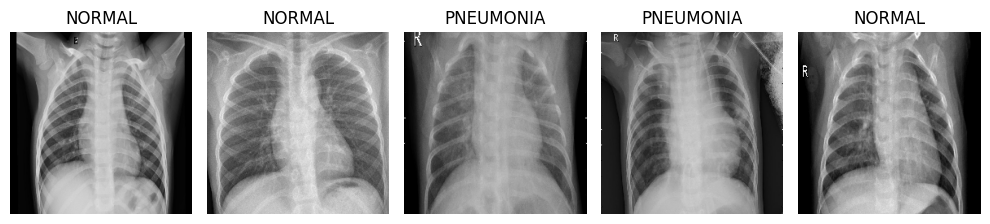

In [4]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def analyze_dataset(directory, title="Dataset Analysis"):
    """
    Analyze and display dataset information including class distribution.
    
    Args:
        directory (str): Path to the dataset directory
        title (str): Title for the analysis output
    """
    # Get class names from subdirectories
    classes = sorted(os.listdir(directory))
    
    # Count number of files in each class
    class_counts = {}
    for cls in classes:
        class_path = os.path.join(directory, cls)
        if os.path.isdir(class_path):
            class_counts[cls] = len(os.listdir(class_path))
    
    # Print dataset information
    print(f"\n{'='*50}")
    print(f"{title.upper():^50}")
    print(f"{'='*50}")
    print(f"Dataset directory: {directory}")
    print(f"Total number of classes: {len(class_counts)}")
    print(f"Classes: {list(class_counts.keys())}")
    print(f"\n{'Class Distribution':^30}")
    print("-"*30)
    
    total_samples = sum(class_counts.values())
    for cls, count in class_counts.items():
        print(f"{cls:15}: {count:4} ({count/total_samples:.1%})")
    
    # Plot class distribution
    plt.figure(figsize=(8, 5))
    bars = plt.bar(class_counts.keys(), class_counts.values(), color=['skyblue', 'salmon'])
    plt.title(f'Class Distribution\n{title}')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    
    # Add percentage labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height} ({height/total_samples:.1%})',
                ha='center', va='bottom')
    
    plt.show()
    
    # Print sample images
    print("\nSample images from each class:")
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=5,
        class_mode='binary',
        shuffle=True
    )
    
    # Display sample images
    plt.figure(figsize=(10, 5))
    images, labels = next(generator)
    class_names = list(class_counts.keys())
    
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Analyze all datasets
analyze_dataset(train_dir, "Training Set")
analyze_dataset(val_dir, "Validation Set")
analyze_dataset(test_dir, "Test Set")

## 🧩 Imports and Setup

```python
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
import tempfile
```

- Imports essential libraries for file handling, image processing, dataset splitting, and temporary directory management.

---

## 🔄 Combine and Resplit Dataset Function

```python
def combine_and_resplit_datasets(original_train_dir, original_val_dir, original_test_dir, 
                               new_train_dir, new_val_dir, new_test_dir,
                               test_size=0.2, val_size=0.1, random_state=42):
    ...
```

### 🧠 Explanation

- This function **combines all images** from the original training, validation, and test directories into a single temporary folder.
- It then **reshuffles and splits** the combined dataset into new training, validation, and test sets with balanced class distributions.
- Parameters:
  - `original_train_dir`, `original_val_dir`, `original_test_dir`: Paths to the original dataset splits.
  - `new_train_dir`, `new_val_dir`, `new_test_dir`: Paths where the newly split datasets will be saved.
  - `test_size`: Fraction of data reserved for the test set (e.g., 0.2 = 20%).
  - `val_size`: Fraction of the training+validation data reserved for validation.
  - `random_state`: Seed for reproducibility.

---

## 📂 Temporary Directory and Image Copying

- A temporary directory is created to hold **all images combined from original splits**.
- Images are copied while **maintaining the class subfolder structure** (`NORMAL` and `PNEUMONIA`).
- Duplicate filenames are handled by appending `_dup` to avoid overwriting.

---

## 🔄 Data Loading and Splitting

- Loads all images using `ImageDataGenerator` with rescaling (`1./255`).
- Extracts all images and labels into arrays.
- First splits the combined data into:
  - `train+val` (80%)
  - `test` (20%)
- Then splits `train+val` further into:
  - `train` (90% of remaining)
  - `val` (10% of remaining)
- Stratified splitting ensures balanced class distribution across all subsets.

---

## 🗂️ Creating New Directory Structure

- Creates the new folder hierarchy for the train, validation, and test datasets.
- Ensures `NORMAL` and `PNEUMONIA` subfolders exist.

---

## 💾 Saving Images to Disk

- Defines a helper function `save_images()` that:
  - Saves each image to the appropriate class folder with a new filename `img_{index}.jpg`.
- Saves images for the new train, val, and test splits.

---



In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
import tempfile

def combine_and_resplit_datasets(original_train_dir, original_val_dir, original_test_dir, 
                               new_train_dir, new_val_dir, new_test_dir,
                               test_size=0.2, val_size=0.1, random_state=42):
    """
    Combine all datasets and re-split with balanced class distribution.
    
    Args:
        original_train_dir: Path to original training set
        original_val_dir: Path to original validation set
        original_test_dir: Path to original test set
        new_train_dir: Path for new training set
        new_val_dir: Path for new validation set
        new_test_dir: Path for new test set
        test_size: Proportion for test split
        val_size: Proportion for validation split (of remaining after test split)
        random_state: Random seed for reproducibility
    """
    
    # Create temporary directory to hold all combined images
    with tempfile.TemporaryDirectory() as temp_dir:
        # Copy all images to temporary directory maintaining class structure
        for original_dir in [original_train_dir, original_val_dir, original_test_dir]:
            for class_name in ['NORMAL', 'PNEUMONIA']:
                src_dir = os.path.join(original_dir, class_name)
                dst_dir = os.path.join(temp_dir, class_name)
                
                os.makedirs(dst_dir, exist_ok=True)
                
                for img_file in os.listdir(src_dir):
                    src_path = os.path.join(src_dir, img_file)
                    dst_path = os.path.join(dst_dir, img_file)
                    
                    # Handle potential duplicate filenames
                    if os.path.exists(dst_path):
                        base, ext = os.path.splitext(img_file)
                        dst_path = os.path.join(dst_dir, f"{base}_dup{ext}")
                    
                    shutil.copy(src_path, dst_path)
        
        # Create image data generator to load all images
        datagen = ImageDataGenerator(rescale=1./255)
        generator = datagen.flow_from_directory(
            temp_dir,
            target_size=(img_height, img_width),
            batch_size=5216+16+624,  # Total number of images
            class_mode='binary',
            shuffle=False
        )
        
        # Get all images and labels
        images, labels = next(generator)
        
        # Split into train+val and test first
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            images, labels, 
            test_size=test_size,
            stratify=labels,
            random_state=random_state
        )
        
        # Split train_val into train and val
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val,
            test_size=val_size/(1-test_size),  # Adjusted val_size
            stratify=y_train_val,
            random_state=random_state
        )
    
    # Create new directory structure
    for dir_path in [new_train_dir, new_val_dir, new_test_dir]:
        os.makedirs(os.path.join(dir_path, 'NORMAL'), exist_ok=True)
        os.makedirs(os.path.join(dir_path, 'PNEUMONIA'), exist_ok=True)
    
    # Function to save images to new directory structure
    def save_images(images, labels, target_dir):
        class_names = ['NORMAL', 'PNEUMONIA']
        for i, (image, label) in enumerate(zip(images, labels)):
            class_name = class_names[int(label)]
            img_path = os.path.join(target_dir, class_name, f"img_{i}.jpg")
            plt.imsave(img_path, image)
    
    # Save the new splits
    save_images(X_train, y_train, new_train_dir)
    save_images(X_val, y_val, new_val_dir)
    save_images(X_test, y_test, new_test_dir)
    
    print("\nDataset successfully re-split with balanced distribution!")



## ✅ Running the Re-split

```python
new_train_dir = '/kaggle/working/chest_xray/train'
new_val_dir = '/kaggle/working/chest_xray/val'
new_test_dir = '/kaggle/working/chest_xray/test'

combine_and_resplit_datasets(
    original_train_dir=train_dir,
    original_val_dir=val_dir,
    original_test_dir=test_dir,
    new_train_dir=new_train_dir,
    new_val_dir=new_val_dir,
    new_test_dir=new_test_dir,
    test_size=0.2,
    val_size=0.1
)
```

- Defines new dataset directories and calls the function to perform the combining and re-splitting.

---

## 📊 Analyzing the New Dataset Splits

```python
analyze_dataset(new_train_dir, "New Training Set")
analyze_dataset(new_val_dir, "New Validation Set")
analyze_dataset(new_test_dir, "New Test Set")
```

- Uses the previously defined `analyze_dataset()` function to:
  - Print class distribution statistics.
  - Visualize sample images from the new dataset splits.
```


Found 5856 images belonging to 2 classes.

Dataset successfully re-split with balanced distribution!

                 NEW TRAINING SET                 
Dataset directory: /kaggle/working/chest_xray/train
Total number of classes: 2
Classes: ['NORMAL', 'PNEUMONIA']

      Class Distribution      
------------------------------
NORMAL         : 1108 (27.0%)
PNEUMONIA      : 2990 (73.0%)


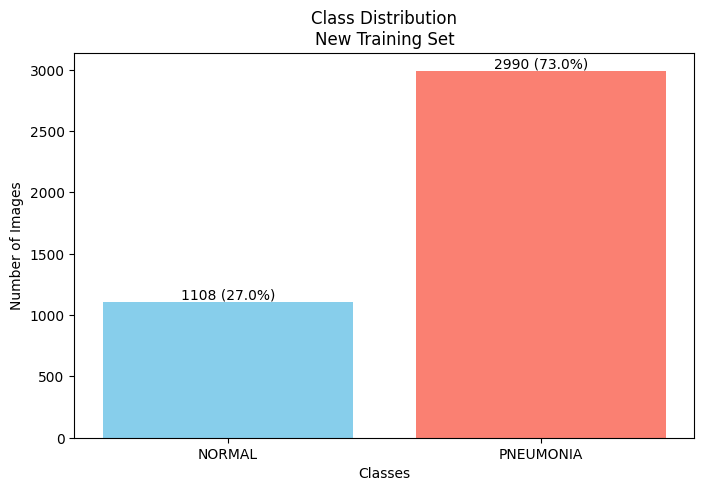


Sample images from each class:
Found 4098 images belonging to 2 classes.


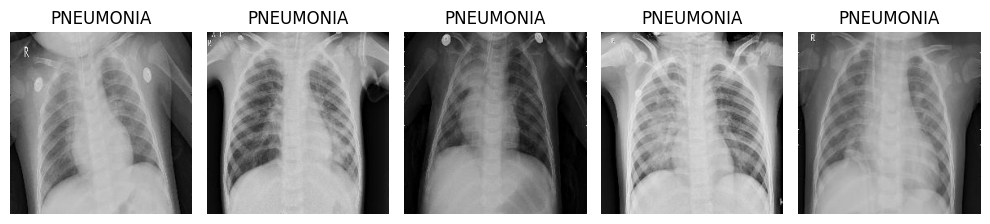


                NEW VALIDATION SET                
Dataset directory: /kaggle/working/chest_xray/val
Total number of classes: 2
Classes: ['NORMAL', 'PNEUMONIA']

      Class Distribution      
------------------------------
NORMAL         :  158 (27.0%)
PNEUMONIA      :  428 (73.0%)


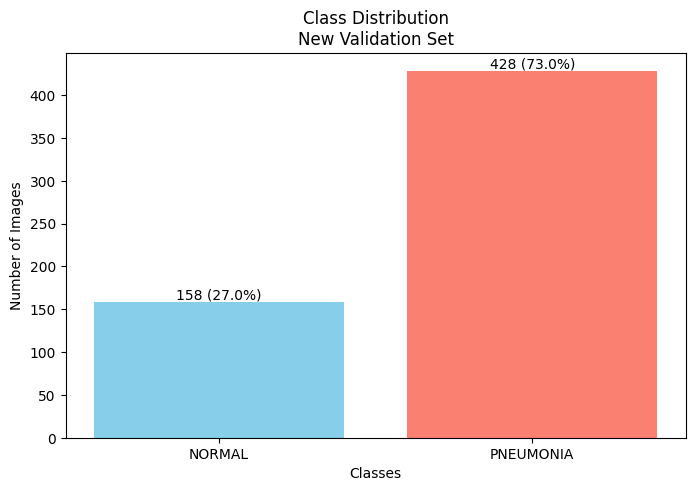


Sample images from each class:
Found 586 images belonging to 2 classes.


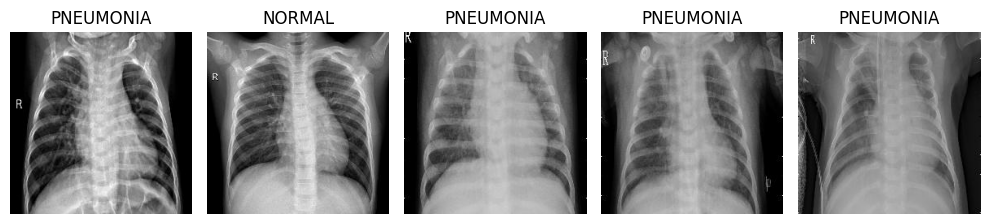


                   NEW TEST SET                   
Dataset directory: /kaggle/working/chest_xray/test
Total number of classes: 2
Classes: ['NORMAL', 'PNEUMONIA']

      Class Distribution      
------------------------------
NORMAL         :  317 (27.0%)
PNEUMONIA      :  855 (73.0%)


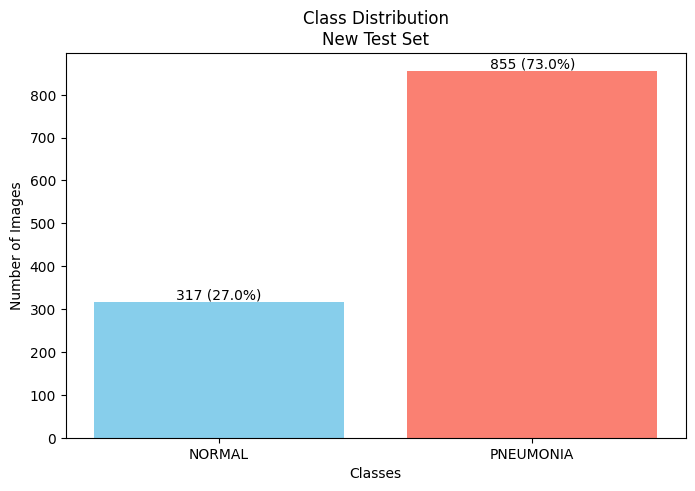


Sample images from each class:
Found 1172 images belonging to 2 classes.


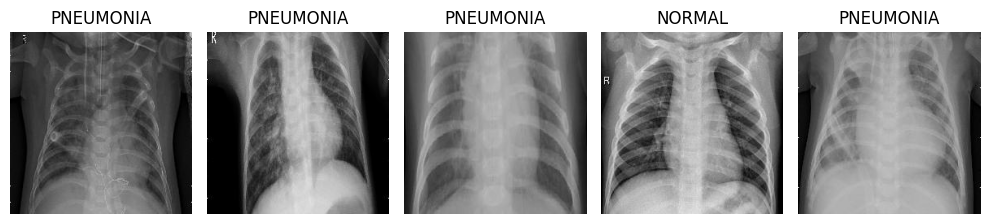

In [6]:
# Define new directory paths
new_train_dir = '/kaggle/working/chest_xray/train'
new_val_dir = '/kaggle/working/chest_xray/val'
new_test_dir = '/kaggle/working/chest_xray/test'

# Combine and re-split the dataset
combine_and_resplit_datasets(
    original_train_dir=train_dir,
    original_val_dir=val_dir,
    original_test_dir=test_dir,
    new_train_dir=new_train_dir,
    new_val_dir=new_val_dir,
    new_test_dir=new_test_dir,
    test_size=0.2,  # 20% for test
    val_size=0.1    # 10% for validation (of remaining 80%)
)

# Analyze the new datasets
analyze_dataset(new_train_dir, "New Training Set")
analyze_dataset(new_val_dir, "New Validation Set")
analyze_dataset(new_test_dir, "New Test Set")

## 📦 Imports

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
```

- Imports libraries for image processing (`cv2`), numerical operations (`numpy`), plotting (`matplotlib`), TensorFlow, and ResNet50-specific preprocessing.

---

## ⚙️ Preprocessing Function for Chest X-ray Images

```python
def preprocess_chest_xray_for_resnet50(image, visualize=False):
    """
    Full preprocessing pipeline for chest X-ray images targeting ResNet50:
    1. Convert to grayscale (if needed)
    2. Normalize to [0,1]
    3. Noise reduction (Gaussian + Median filtering)
    4. Contrast enhancement using CLAHE
    5. Gamma correction
    6. Convert to RGB (3 channels)
    7. Resize to 224x224
    8. ResNet50 preprocessing
    9. Optionally visualize each step
    """
    ...
```

### 🔍 Step-by-step Explanation

1. **Convert Tensor to Numpy array**  
   Converts input from TensorFlow tensor to numpy array if necessary for OpenCV compatibility.

2. **Grayscale Conversion**  
   Converts RGB image to grayscale if the input has 3 channels.

3. **Normalization**  
   Scales pixel intensities to the range [0,1] to standardize input values.

4. **Noise Reduction**  
   Applies Gaussian blur followed by median filtering to reduce noise while preserving edges.

5. **Contrast Enhancement (CLAHE)**  
   Uses Contrast Limited Adaptive Histogram Equalization (CLAHE) with a low clip limit to improve local contrast without amplifying noise.

6. **Gamma Correction**  
   Applies gamma correction with γ=0.7 to brighten the image and enhance visibility of details.

7. **Convert to 3-channel RGB**  
   Stacks the single grayscale image into 3 identical channels to match ResNet50 input requirements.

8. **Resize to 224x224**  
   Resizes the image to the standard input size expected by ResNet50.

9. **ResNet50 Preprocessing**  
   Applies ResNet50-specific preprocessing which includes mean subtraction and scaling.

10. **Optional Visualization**  
    Displays a subplot showing intermediate results for original, denoised, CLAHE, and gamma-corrected images.

---

## 🔄 Function Output

- Returns the fully preprocessed image tensor ready to be fed into ResNet50 for prediction or training.

---


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess

def preprocess_chest_xray_for_resnet50(image, visualize=False):
    """
    Full preprocessing pipeline for chest X-ray images targeting ResNet50:
    1. Convert to grayscale (if needed)
    2. Normalize to [0,1]
    3. Noise reduction (Gaussian + Median filtering)
    4. Contrast enhancement using CLAHE
    5. Gamma correction
    6. Convert to RGB (3 channels)
    7. Resize to 224x224
    8. ResNet50 preprocessing
    9. Optionally visualize each step
    """

    # Convert to numpy array if it's a tensor
    if tf.is_tensor(image):
        image = image.numpy()
    
    # Convert to grayscale if it has 3 channels
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    original_image = image.copy()  # For visualization

    # Normalize to [0,1]
    image = image.astype('float32')
    image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-8)
    
    # Scale to [0,255] for image processing
    image_uint8 = (image * 255).astype('uint8')

    # --- Noise Reduction ---
    denoised = cv2.GaussianBlur(image_uint8, (3, 3), 0)
    denoised = cv2.medianBlur(denoised, 3)

    # --- CLAHE ---
    clahe = cv2.createCLAHE(clipLimit=0.03, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(denoised)

    # --- Gamma Correction ---
    gamma = 0.7
    contrast_float = contrast_enhanced.astype('float32') / 255.0
    gamma_corrected = np.power(contrast_float, gamma)

    # Convert to 8-bit
    final_image = (gamma_corrected * 255).astype(np.uint8)

    # Convert to RGB
    final_image_rgb = np.stack((final_image,) * 3, axis=-1)

    # Resize to 224x224 for ResNet50
    final_image_rgb = cv2.resize(final_image_rgb, (224, 224))

    # Convert to float32 before applying ResNet50 preprocessing
    final_image_rgb = final_image_rgb.astype('float32')

    # Apply ResNet50 preprocessing (mean subtraction)
    resnet_ready = resnet_preprocess(final_image_rgb)

    # --- Visualization ---
    if visualize:
        fig, axs = plt.subplots(1, 4, figsize=(16, 4))
        axs = axs.ravel()
        steps = [original_image, denoised, contrast_enhanced, final_image]
        titles = ["Original", "Denoised", "CLAHE", "Gamma Corrected"]
        
        for i in range(4):
            axs[i].imshow(steps[i], cmap='gray')
            axs[i].set_title(titles[i])
            axs[i].axis('off')
        
        plt.tight_layout()
        plt.show()

    return resnet_ready

## 🔄 Data Generators with Enhanced Preprocessing

### 1. Define Training Data Generator

```python
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_chest_xray_for_resnet50,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
```

- Uses the custom `preprocess_chest_xray_for_resnet50` function to preprocess images before feeding to the model.
- Applies data augmentation to the training set:
  - Random rotations up to 20 degrees
  - Horizontal and vertical shifts up to 20% of image size
  - Shearing transformations
  - Zooming in/out up to 20%
  - Random horizontal flips
- `fill_mode='nearest'` fills in pixels when transformations shift parts of the image.

---

In [8]:
# Update your data generators with the enhanced preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_chest_xray_for_resnet50,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### 2. Define Validation and Test Data Generators

```python
val_test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_chest_xray_for_resnet50
)
```

- Uses the same preprocessing function but **without augmentation** for validation and test sets to ensure evaluation on consistent data.

---

### 3. Create Data Generators from Directory Structure

```python
train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_test_datagen.flow_from_directory(
    new_val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)

test_generator = val_test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)
```

- Loads images from directories for training, validation, and testing.
- Resizes all images to the specified `img_height` and `img_width` (224x224).
- Sets `batch_size` to control number of images per batch.
- Uses binary class mode for two classes (e.g., NORMAL and PNEUMONIA).
- Uses RGB color mode because the preprocessing outputs 3-channel images.
- Shuffle is disabled for test generator to preserve order for evaluation.

---

## 🔄 Summary

- Training data generator includes both preprocessing and augmentation.
- Validation and test data generators include only preprocessing for fair evaluation.
- These generators feed images directly to the model during training and evaluation.
```

In [9]:
val_test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_chest_xray_for_resnet50
)

# Recreate your data generators with the new preprocessing
train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_test_datagen.flow_from_directory(
    new_val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)

test_generator = val_test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

Found 4098 images belonging to 2 classes.
Found 586 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


## Visualization of Preprocessing Stages for Chest X-ray Images (ResNet50)

### 1. `display_preprocessing_stages_resnet50` function

- Takes an input chest X-ray image and shows each key step of the preprocessing pipeline used for ResNet50:
  - Original grayscale image
  - Denoised image (Gaussian + Median filtering)
  - Contrast enhanced with CLAHE
  - Gamma corrected image
  - Final RGB image (stacked grayscale channels)
  - ResNet50 preprocessed image (mean subtraction & normalization reversed for display)

- Steps include:
  - Convert RGB to grayscale if needed
  - Normalize pixel values to [0,1]
  - Apply noise reduction filters
  - Use CLAHE for contrast enhancement
  - Perform gamma correction to adjust brightness
  - Convert single-channel image to 3-channel RGB
  - Resize to 224x224 (ResNet50 input size)
  - Apply ResNet50 preprocessing (`tf.keras.applications.resnet.preprocess_input`)
  - Reverse preprocessing to visualize the normalized input

- Displays images in a 2x3 grid with titles and dimension annotations.

### 2. Example usage

```python
# Load a sample image
image = cv2.imread('/kaggle/input/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg')

# Display preprocessing stages visually
display_preprocessing_stages_resnet50(image)
```

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess

def display_preprocessing_stages_resnet50(image, figsize=(24, 10), dpi=100):
    """
    Display each stage of preprocessing for chest X-ray images for ResNet50.
    Stages:
    1. Original
    2. Denoised
    3. CLAHE
    4. Gamma Corrected
    5. Final RGB
    6. ResNet Preprocessed (visualized back to [0, 1])
    """

    # Convert to numpy array if it's a tensor
    if tf.is_tensor(image):
        image = image.numpy()

    # Convert to grayscale if it has 3 channels
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    elif len(image.shape) == 3 and image.shape[2] == 1:
        image = np.squeeze(image, axis=-1)

    original = image.copy()

    # Normalize to [0,1]
    image = image.astype('float32')
    image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-8)
    image_uint8 = (image * 255).astype('uint8')

    # --- Noise Reduction ---
    denoised = cv2.GaussianBlur(image_uint8, (3, 3), 0)
    denoised = cv2.medianBlur(denoised, 3)

    # --- CLAHE ---
    clahe = cv2.createCLAHE(clipLimit=0.03, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(denoised)

    # --- Gamma Correction ---
    gamma = 0.7
    contrast_float = contrast_enhanced.astype('float32') / 255.0
    gamma_corrected = np.power(contrast_float, gamma)
    gamma_corrected_uint8 = (gamma_corrected * 255).astype('uint8')

    # --- Convert to RGB ---
    final_rgb = np.stack((gamma_corrected_uint8,) * 3, axis=-1)

    # --- Resize for ResNet50 input (224x224) ---
    resized = cv2.resize(final_rgb, (224, 224))

    # --- Apply ResNet preprocessing ---
    resnet_input = resnet_preprocess(resized.astype('float32'))

    # Convert back for visualization: reverse mean subtraction
    resnet_vis = resnet_input.copy()
    resnet_vis[..., 0] += 103.939
    resnet_vis[..., 1] += 116.779
    resnet_vis[..., 2] += 123.68
    resnet_vis = np.clip(resnet_vis / 255.0, 0, 1)  # Normalize for display

    # --- Plot all stages ---
    titles = ["Original", "Denoised", "CLAHE", "Gamma Corrected", "Final RGB", "ResNet Preprocessed"]
    images = [original, denoised, contrast_enhanced, gamma_corrected_uint8, final_rgb, resnet_vis]

    plt.figure(figsize=figsize, dpi=dpi)

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        cmap = 'gray' if i < 4 else None
        plt.imshow(img, cmap=cmap)
        plt.title(title, fontsize=12, pad=10)
        plt.axis('off')

        # Show dimensions
        h, w = img.shape[:2]
        plt.text(5, 15, f"{w}x{h}",
                 color='white' if i < 4 else 'black',
                 bbox=dict(facecolor='red', alpha=0.5), fontsize=10)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05, hspace=0.2)
    plt.show()

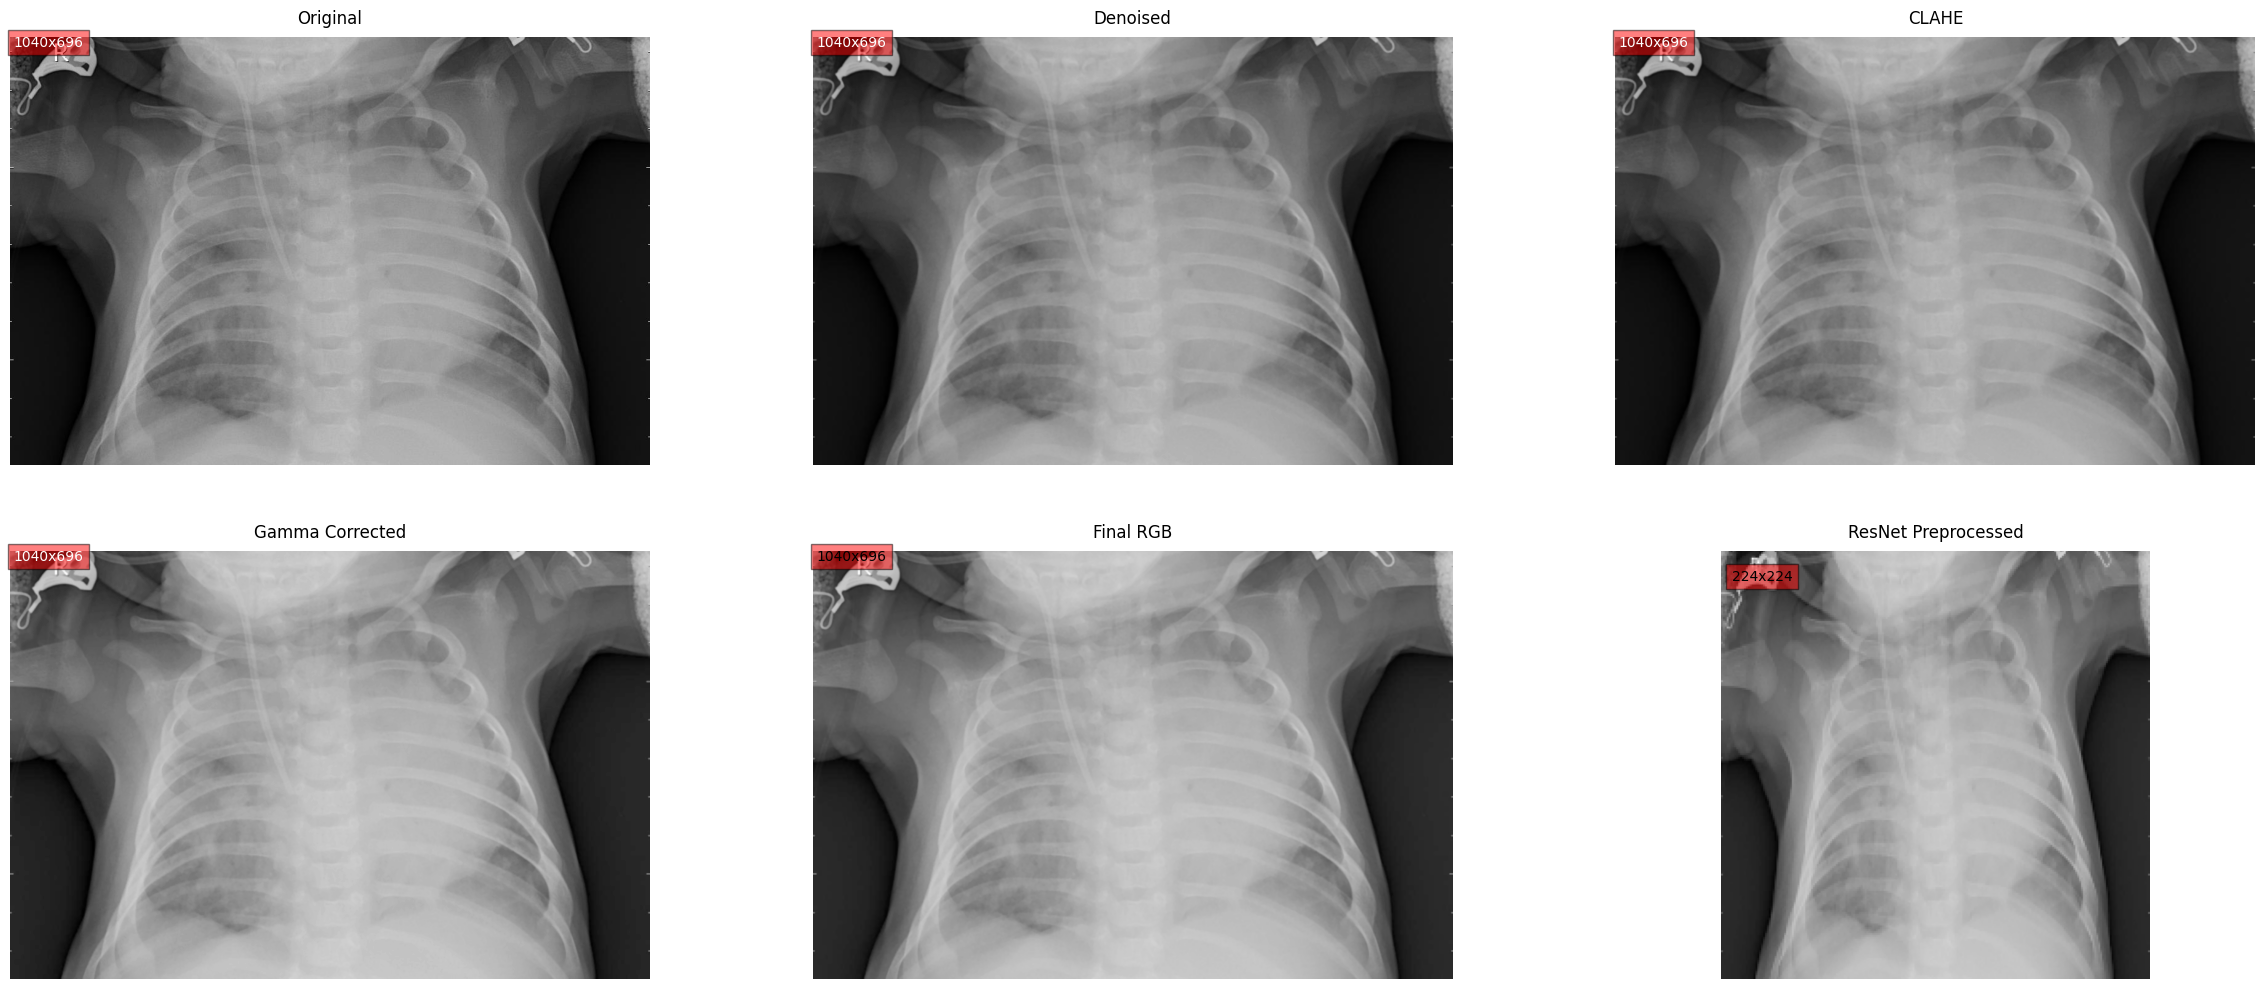

In [11]:
# Load your image
image = cv2.imread('/kaggle/input/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg')

display_preprocessing_stages_resnet50(image)


### 2. `reverse_resnet_preprocessing` function

- Reverts the ResNet50 preprocessing to enable proper visualization:
  - Adds back ImageNet mean values subtracted during preprocessing
  - Converts image from BGR (OpenCV default) to RGB
  - Clips and normalizes pixel values to [0,1] range

---

### 3. `display_images_from_generator_resnet` function

- Displays a grid of images fetched from a Keras generator with ResNet50 preprocessing applied.
- Steps:
  - Retrieves a batch from the generator
  - Reverses preprocessing on each image for correct display
  - Decodes numeric labels into class names if provided
  - Shows images with their corresponding labels in a grid format

---

### 4. Example usage

```python
# Display a batch of preprocessed images from the training generator
display_images_from_generator_resnet(
    generator=train_generator,
    num_images=9,
    class_indices=train_generator.class_indices  # Optional mapping of label indices to class names
)
```

---

### Summary

This code provides visual insights into how raw chest X-ray images are transformed step-by-step before being fed to a ResNet50 model. It helps to debug, verify, and explain the preprocessing pipeline by displaying intermediate results and final augmented data samples.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess

def reverse_resnet_preprocessing(image):
    """
    Reverses ResNet50 preprocessing for visualization (convert BGR to RGB and add mean).
    Assumes input image was preprocessed using tf.keras.applications.resnet50.preprocess_input.
    """
    # Clone to avoid modifying original
    image = image.copy()

    # ResNet50 preprocess subtracts ImageNet mean in BGR order
    image[..., 0] += 103.939  # B
    image[..., 1] += 116.779  # G
    image[..., 2] += 123.68   # R

    # Convert BGR to RGB
    image = image[..., ::-1]

    # Clip to valid range and normalize to [0, 1]
    image = np.clip(image / 255.0, 0, 1)
    
    return image

def display_images_from_generator_resnet(generator, num_images=9, class_indices=None):
    """
    Displays a batch of ResNet-preprocessed images from a generator with proper reverse normalization.

    Args:
        generator: A Keras ImageDataGenerator or similar generator.
        num_images: Number of images to display.
        class_indices: Optional dict to decode numeric labels into class names.
    """
    # Fetch batch from generator
    images, labels = next(generator)

    # Prepare decoding
    label_map = {v: k for k, v in (class_indices or {}).items()} if class_indices else None

    # Define grid
    num_rows = int(np.ceil(np.sqrt(num_images)))
    num_cols = int(np.ceil(num_images / num_rows))

    plt.figure(figsize=(12, 12))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Reverse preprocessing for ResNet
        display_img = reverse_resnet_preprocessing(images[i])
        plt.imshow(display_img)

        # Get label
        if labels.ndim == 1:
            label = labels[i]
        elif labels.ndim == 2 and labels.shape[1] == 1:
            label = labels[i][0]
        else:  # one-hot
            label = np.argmax(labels[i])
        
        label_text = label_map[label] if label_map else str(label)
        plt.title(f"Label: {label_text}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


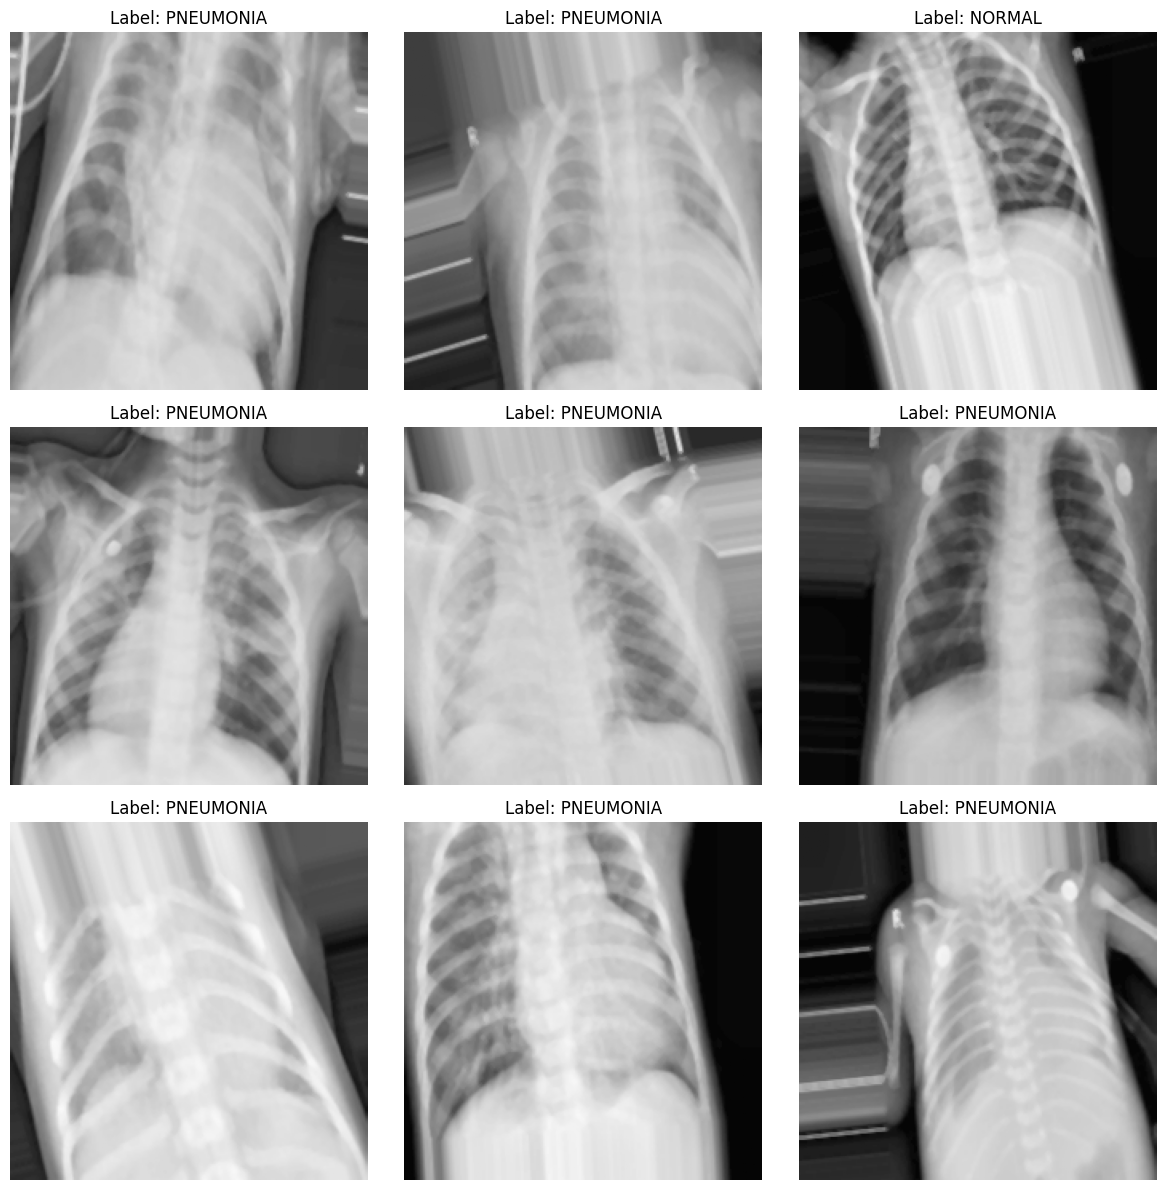

In [13]:
display_images_from_generator_resnet(
    generator=train_generator,
    num_images=9,
    class_indices=train_generator.class_indices  # optional: maps label to class name
)


## Building and Compiling the Pneumonia Detection Model with ResNet50 Backbone

### 1. Load Pretrained ResNet50 Base Model
- Using `tensorflow.keras.applications.ResNet50` with:
  - Input shape matching your image size: `(img_height, img_width, 3)`
  - `include_top=False`: excludes the original classification head, so you can add your own.
  - `weights='imagenet'`: loads pretrained weights from ImageNet.
- Set `base_model.trainable = True` to fine-tune the entire ResNet50 model during training (not just the top layers).

---

### 2. Build a Custom Classification Head with `Sequential` API
- Add the `base_model` as the first layer.
- Add `GlobalAveragePooling2D()` to convert the convolutional features into a single vector per image.
- Add a fully connected dense layer with 128 units and ReLU activation for learning complex representations.
- Add `Dropout(0.5)` for regularization to reduce overfitting.
- Add the final dense layer with 1 unit and sigmoid activation for binary classification (Normal vs Pneumonia).

---

### 3. Compile the Model
- Optimizer: Adam with learning rate `1e-4`.
- Loss: Binary crossentropy (appropriate for binary classification).
- Metrics: Accuracy to monitor training performance.

---

### 4. Summary
- `model.summary()` prints a layer-by-layer summary, including output shapes and number of parameters.
- This setup allows end-to-end training and fine-tuning of ResNet50 with your chest X-ray data.

---

### Code Example:

```python
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
```

---

This model is ready to be trained on your preprocessed chest X-ray images for pneumonia detection.



In [14]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True  # Fine-tune the whole model


I0000 00:00:1748330418.619198      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [15]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 23,796,993 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

## Training the Model with Callbacks

### Callbacks used:

- **EarlyStopping**
  - Monitors validation loss (`val_loss`).
  - Stops training if validation loss does not improve for 10 consecutive epochs (`patience=10`).
  - Restores the best model weights after stopping (`restore_best_weights=True`).
  - Provides verbose output.

- **ReduceLROnPlateau**
  - Monitors validation loss (`val_loss`).
  - Reduces the learning rate by a factor of 0.5 if validation loss does not improve for 4 epochs (`patience=4`).
  - The learning rate will not be reduced below `1e-7`.
  - Verbose output to inform about learning rate reductions.

- **ModelCheckpoint**
  - Saves the model to the file `'best_model.keras'`.
  - Only saves the model when the validation loss improves (`save_best_only=True`).
  - Saves the entire model (architecture + weights), not just weights (`save_weights_only=False`).
  - Verbose output on save.

---

### Fitting the Model:

- Train using `model.fit()` with:
  - `train_generator`: training data generator.
  - `val_generator`: validation data generator.
  - Train for up to 40 epochs.
  - Use the callbacks to automatically stop training early, reduce learning rate when stuck, and save the best model.

---

### Code example:

```python
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    callbacks=[early_stop, reduce_lr, checkpoint]
)
```

---

This setup helps:
- Prevent overfitting by stopping early.
- Improve convergence by adapting learning rate.
- Save your best-performing model automatically.


In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Fit model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    callbacks=[early_stop, reduce_lr, checkpoint]
)


Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1748330479.651570     135 service.cc:148] XLA service 0x7f7c100047e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748330479.652355     135 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748330484.385326     135 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/129 ━━━━━━━━━━━━━━━━━━━━ 2:44:22 77s/step - accuracy: 0.4375 - loss: 0.7726

I0000 00:00:1748330504.932341     135 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.8602 - loss: 0.3065
Epoch 1: val_loss improved from inf to 1.11871, saving model to best_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 158s 629ms/step - accuracy: 0.8606 - loss: 0.3057 - val_accuracy: 0.7560 - val_loss: 1.1187 - learning_rate: 1.0000e-04
Epoch 2/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9515 - loss: 0.1454
Epoch 2: val_loss improved from 1.11871 to 0.68885, saving model to best_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 59s 436ms/step - accuracy: 0.9515 - loss: 0.1454 - val_accuracy: 0.7679 - val_loss: 0.6889 - learning_rate: 1.0000e-04
Epoch 3/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9590 - loss: 0.1165
Epoch 3: val_loss improved from 0.68885 to 0.25365, saving model to best_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 59s 431ms/step - accuracy: 0.9591 - loss: 0.1163 - val_accuracy: 0.9420 - val_loss: 0.2536 - learning_rate: 1.0000e-04
Epoch 4/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/st

### Explanation of Test Set Evaluation
**Model evaluation on the test set:**  
  Using `model.evaluate(test_generator)`, the model’s performance is measured on the entire test set, reporting both the loss and accuracy metrics. This gives a high-level quantitative assessment of how well the model generalizes to unseen data.

In [17]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 0.9782 - loss: 0.0687
Test Accuracy: 0.9787
Test Loss: 0.0769


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

# 📊 Training History Plotting - Explanation

This section focuses on visualizing the model's learning behavior during training and validation using smoothed accuracy and loss plots. It includes a smoothing function and a plotting function to improve interpretability.

---

## 🔁 `smooth_curve(points, factor=0.8)`

**Purpose:**  
Smooths fluctuations in the raw metric values (like accuracy or loss) to better visualize overall trends.

**How it works:**  
- Applies exponential smoothing:
  - `smoothed_value = previous_smoothed * factor + current_point * (1 - factor)`
- The `factor` determines how smooth the result is:
  - A higher factor (e.g., 0.8) results in smoother curves by giving more weight to past values.

**Output:**  
A list of smoothed values to be used in plots.

---

## 📈 `plot_training_history(history)`

**Purpose:**  
Visualizes training progress by plotting both accuracy and loss curves for training and validation sets.

**Steps:**

1. **Extract Metrics:**
   - `accuracy`, `val_accuracy`, `loss`, and `val_loss` are extracted from the `history.history` dictionary.

2. **Smooth the Curves:**
   - The extracted values are passed through `smooth_curve()` to eliminate noise and improve visualization.

3. **Create Plot:**
   - A figure with two subplots is generated:
     - **Left Plot:** Training and validation accuracy curves.
     - **Right Plot:** Training and validation loss curves.
   - Grid, axis labels, titles, and legends are added for clarity.

4. **Display:**
   - `plt.show()` renders the final plot.

**Benefits:**
- Identifies **overfitting** or **underfitting** by comparing training vs validation metrics.
- Helps determine if the model is improving and when it starts to plateau or diverge.

---

## ✅ Summary

This tool is essential for:
- Monitoring training behavior over epochs.
- Diagnosing training issues like overfitting or underfitting.
- Making informed decisions about learning rate, epochs, and regularization


In [19]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

def plot_training_history(history):
    """
    Plots smoothed training and validation accuracy/loss over epochs.
    """
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])

    plt.figure(figsize=(12, 5))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(smooth_curve(acc), label='Smoothed Training Accuracy')
    plt.plot(smooth_curve(val_acc), label='Smoothed Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(smooth_curve(loss), label='Smoothed Training Loss')
    plt.plot(smooth_curve(val_loss), label='Smoothed Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()


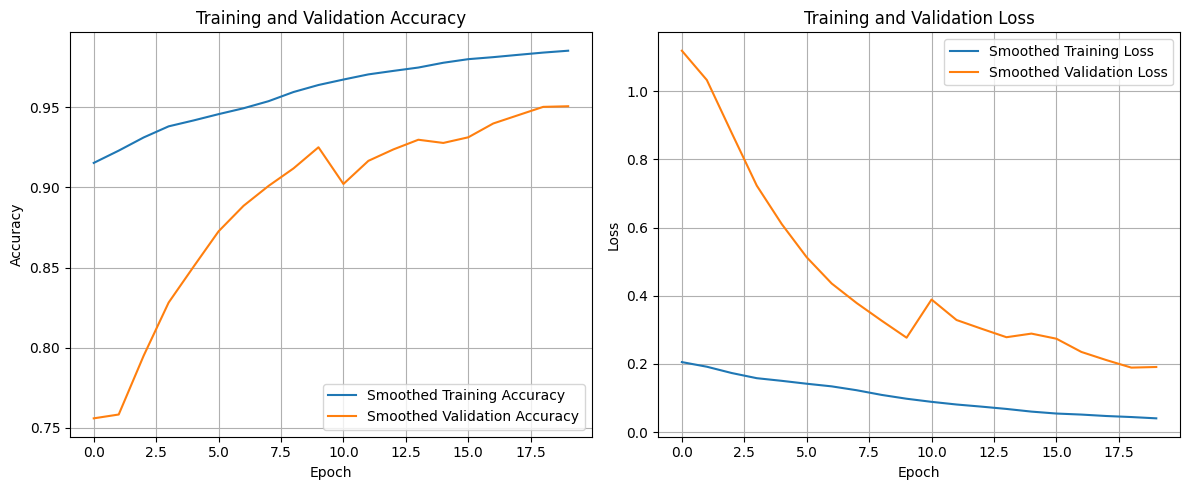

In [20]:
plot_training_history(history)

### Explanation of Test Set Evaluation and Metrics

- **Disable shuffling in the test generator:**  
  When creating the `test_generator`, we set `shuffle=False` to ensure the order of images is preserved. This is crucial because we want the predicted labels to align correctly with the true labels. Shuffling would break this alignment, making evaluation unreliable.

- **Model evaluation on the test set:**  
  Using `model.evaluate(test_generator)`, the model’s performance is measured on the entire test set, reporting both the loss and accuracy metrics. This gives a high-level quantitative assessment of how well the model generalizes to unseen data.

- **Resetting the test generator before predictions:**  
  Calling `test_generator.reset()` ensures the generator’s internal pointer returns to the start, so predictions will be made on the entire test dataset in order.

- **Predicting on the test set:**  
  The model outputs probabilities for the positive class (pneumonia). These probabilities are converted to binary labels (`0` or `1`) by applying a threshold of 0.5.

- **Retrieving true labels:**  
  The true class labels for the test images are obtained directly from `test_generator.classes`, which corresponds to the class indices assigned during generator creation.

- **Confusion matrix:**  
  The confusion matrix compares the true labels with predicted labels to show counts of:
  - True Positives (correctly predicted pneumonia cases)
  - True Negatives (correctly predicted normal cases)
  - False Positives and False Negatives (errors)  
  This matrix helps visualize model performance in each class.

- **Plotting the confusion matrix:**  
  A heatmap visualization is created with `seaborn` to clearly display the confusion matrix values, labeled by class names (`Normal` and `Pneumonia`). This visual aid makes interpretation easier.

- **Classification report:**  
  A detailed text report is printed that includes precision, recall, F1-score, and support (number of samples) for each class. This report provides deeper insight into the model’s strengths and weaknesses for each category.

- **Precision, Recall, and F1-Score:**  
  These three key metrics are calculated separately and printed:  
  - *Precision:* How many predicted positives are actually positive  
  - *Recall:* How many actual positives are correctly predicted  
  - *F1-Score:* Harmonic mean of precision and recall, balancing both metrics  

These metrics are essential for evaluating models especially in medical diagnosis, where false positives and false negatives have different consequences.


Found 1172 images belonging to 2 classes.
 1/37 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 1.0000 - loss: 0.0035

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9782 - loss: 0.0687
Test Accuracy: 0.9787
Test Loss: 0.0769
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step
Confusion Matrix:
[[308   9]
 [ 16 839]]


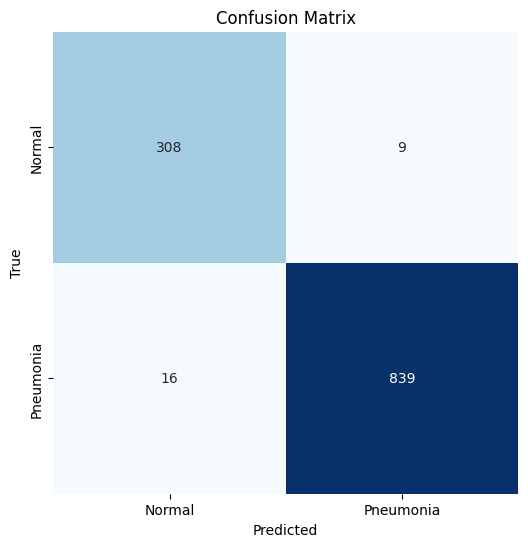

Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.97      0.96       317
   Pneumonia       0.99      0.98      0.99       855

    accuracy                           0.98      1172
   macro avg       0.97      0.98      0.97      1172
weighted avg       0.98      0.98      0.98      1172

Precision: 0.9894
Recall: 0.9813
F1-Score: 0.9853


In [21]:
# Disable shuffling in the test generator
test_generator = val_test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',  # Load images as RGB (even though they are grayscale)
    shuffle=False  # Disable shuffling to ensure alignment
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Reset the test generator before making predictions
test_generator.reset()

# Predict on the test set
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get true labels
y_true = test_generator.classes

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

# Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

### Explanation of `predict_pneumonia` Function and Visualization

- **Purpose:**  
  The `predict_pneumonia` function takes a chest X-ray image path and a trained model to predict whether the image shows pneumonia or not. It also provides detailed confidence analysis, clinical interpretation, and optional visualization of preprocessing and results.

- **Image loading and validation:**  
  The function uses OpenCV (`cv2.imread`) to load the image. If the image is not found or corrupted, it raises an error and returns a failure message.

- **Original image preparation:**  
  The loaded BGR image is converted to RGB for consistent color display.

- **Preprocessing:**  
  The image is preprocessed using a custom preprocessing function tailored for ResNet50 input requirements (likely normalization, resizing, etc.). If `visualize=True`, it shows intermediate preprocessing steps.

- **Prediction:**  
  The preprocessed image is expanded to a batch of one and passed through the model. The raw output probability is obtained for pneumonia presence.

- **Class assignment:**  
  Based on the raw prediction threshold of 0.5, the image is classified as either `"PNEUMONIA"` or `"NORMAL"`.

- **Confidence level determination:**  
  The distance from the threshold (0.5) is used to assign a confidence level (`Very High`, `High`, `Moderate`, `Low`, `Very Low`) and a qualitative certainty label (`Certain`, `Likely`, etc.). This helps communicate how reliable the prediction is.

- **Clinical interpretation:**  
  According to the prediction probability, a detailed clinical message is generated. This guides medical professionals on how to interpret the findings, including suggestions for follow-up or further diagnostics.

- **Result dictionary:**  
  The function returns a dictionary containing:  
  - `image_path`  
  - `predicted_class`  
  - `confidence` (with raw score, confidence level, certainty, normal vs. pneumonia probabilities, boundary distance, and uncertainty flag)  
  - `interpretation` (clinical text)

- **Visualization with `visualize_prediction_summary`:**  
  If enabled, this helper function displays:  
  - The original image  
  - The preprocessed image (converted back for display by reversing normalization)  
  - A bar chart showing confidence scores for `Normal` vs `Pneumonia` classes with a threshold line at 0.5  
  - Text annotations for prediction, confidence level, and certainty  
  - Prints clinical interpretation and warns if confidence is low, recommending manual review

- **Error handling:**  
  Any issues in loading or processing the image are caught and reported gracefully without crashing.

---

### Example usage

The example at the end runs prediction on a sample chest X-ray image and prints out:

- The predicted class  
- Confidence level and probabilities for both classes  
- Clinical interpretation text  
- A warning if the prediction confidence is low and manual review is recommended

This function and visualization provide an interpretable pipeline for automated pneumonia detection with transparent confidence reporting suitable for clinical support.


In [22]:
def predict_pneumonia(model, image_path, img_height=224, img_width=224, visualize=True):
    """
    Predicts pneumonia from chest X-ray images with preprocessing visualization and confidence analysis.
    """
    try:
        # Load and validate image
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Image not found or corrupted: {image_path}")
        
        original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Show preprocessing steps and get final EfficientNet-preprocessed image
        processed_img = preprocess_chest_xray_for_resnet50(original_img, visualize=visualize)
        
        # Prepare for prediction
        img_input = np.expand_dims(processed_img, axis=0)
        raw_pred = float(model.predict(img_input, verbose=0)[0][0])
        
        # Class prediction
        predicted_class = "PNEUMONIA" if raw_pred > 0.5 else "NORMAL"
        boundary_distance = abs(raw_pred - 0.5)
        
        # Confidence level
        if boundary_distance > 0.4:
            confidence_level, certainty = "Very High", "Certain"
        elif boundary_distance > 0.3:
            confidence_level, certainty = "High", "Likely"
        elif boundary_distance > 0.2:
            confidence_level, certainty = "Moderate", "Suggestive"
        elif boundary_distance > 0.1:
            confidence_level, certainty = "Low", "Uncertain"
        else:
            confidence_level, certainty = "Very Low", "Inconclusive"
        
        # Clinical interpretation
        if raw_pred > 0.7:
            interpretation = ("High confidence of pneumonia. Clinical correlation recommended "
                              "but findings strongly suggest infection.")
        elif raw_pred > 0.6:
            interpretation = ("Moderate confidence of pneumonia. Findings suggestive of infection. "
                              "Clinical correlation advised.")
        elif raw_pred > 0.4:
            interpretation = ("Findings may represent pneumonia. Consider additional imaging "
                              "or clinical correlation.")
        elif raw_pred > 0.3:
            interpretation = ("Low confidence prediction. Findings are non-specific. "
                              "Consider alternative diagnoses.")
        else:
            interpretation = ("No evidence of pneumonia. Findings appear normal with high confidence.")
        
        result = {
            'image_path': image_path,
            'predicted_class': predicted_class,
            'confidence': {
                'raw_score': raw_pred,
                'level': confidence_level,
                'certainty': certainty,
                'normal_confidence': 1 - raw_pred,
                'pneumonia_confidence': raw_pred,
                'boundary_distance': boundary_distance,
                'is_uncertain': boundary_distance < 0.2
            },
            'interpretation': interpretation
        }

        # Final visual summary
        if visualize:
            visualize_prediction_summary(result, original_img, processed_img)

        return result

    except Exception as e:
        error_msg = f"Prediction failed: {str(e)}"
        print(error_msg)
        return {'error': error_msg, 'image_path': image_path}


In [23]:
def visualize_prediction_summary(result, original_img, processed_img):
    """
    Displays the original image, processed image, and model confidence in bar chart.
    """
    plt.figure(figsize=(15, 6))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')
    
    # ResNet50-ready image (visually normalized for display)
    plt.subplot(1, 3, 2)
    
    # Rescale image back from ResNet50 preprocessing
    # ResNet50 preprocess_input subtracts mean RGB values: [103.939, 116.779, 123.68]
    # It expects BGR, so we reverse these before displaying
    vis_img = processed_img.copy()
    vis_img += [103.939, 116.779, 123.68]  # Revert normalization
    vis_img = np.clip(vis_img, 0, 255).astype('uint8')  # Ensure valid pixel range
    
    plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))  # ResNet uses BGR input
    plt.title("Preprocessed for ResNet50", fontsize=12)
    plt.axis('off')

    
    # Confidence plot
    plt.subplot(1, 3, 3)
    conf = {
        'Normal': result['confidence']['normal_confidence'],
        'Pneumonia': result['confidence']['pneumonia_confidence']
    }
    colors = ['#4e79a7', '#e15759']
    plt.bar(conf.keys(), conf.values(), color=colors)
    plt.axhline(y=0.5, color='gray', linestyle='--')
    plt.ylim(0, 1)
    plt.title("Confidence Analysis")
    plt.ylabel("Confidence Score")
    
    # Add text
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1)
    plt.text(0.5, 0.95, 
             f"Prediction: {result['predicted_class']}\n"
             f"Confidence: {result['confidence']['level']}\n"
             f"Certainty: {result['confidence']['certainty']}",
             ha="center", va="top", 
             transform=plt.gca().transAxes,
             bbox=bbox_props)

    plt.tight_layout()
    plt.show()
    
    # Print clinical interpretation
    print("\nCLINICAL INTERPRETATION:")
    print(result['interpretation'])
    if result['confidence']['is_uncertain']:
        print("\n⚠️ NOTE: Low confidence — manual review recommended.")


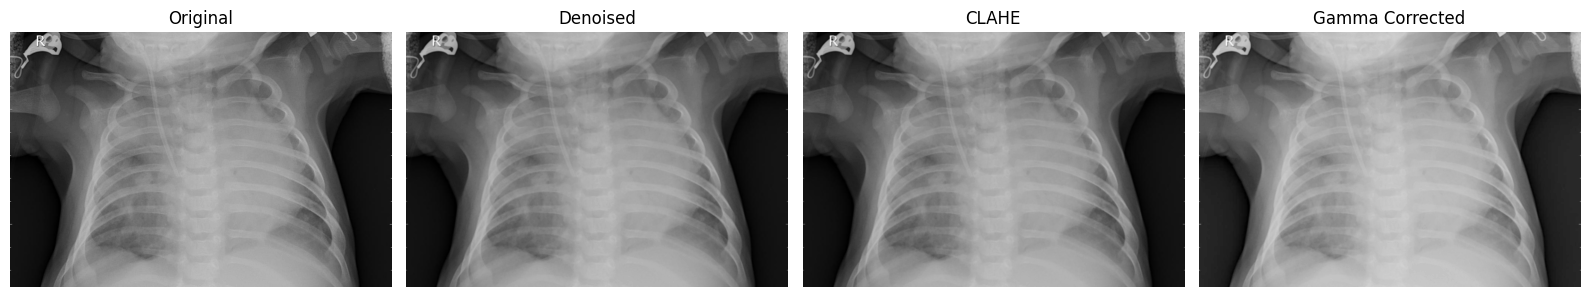

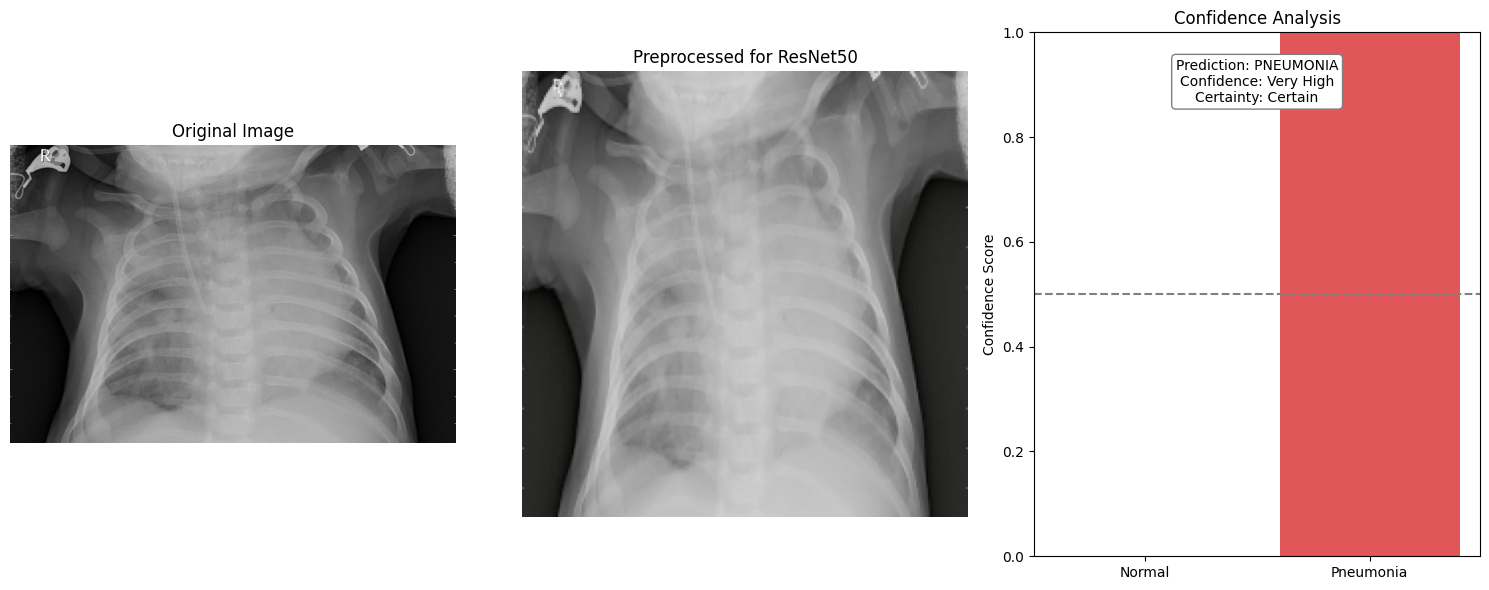


CLINICAL INTERPRETATION:
High confidence of pneumonia. Clinical correlation recommended but findings strongly suggest infection.
Predicted: PNEUMONIA
Confidence Level: Very High
Pneumonia Confidence: 100.0%
Normal Confidence: 0.0%
Clinical Interpretation: High confidence of pneumonia. Clinical correlation recommended but findings strongly suggest infection.


In [24]:
# Test prediction
result = predict_pneumonia(model, "/kaggle/input/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg")

# Print results
if 'error' not in result:
    print(f"Predicted: {result['predicted_class']}")
    print(f"Confidence Level: {result['confidence']['level']}")
    print(f"Pneumonia Confidence: {result['confidence']['pneumonia_confidence']:.1%}")
    print(f"Normal Confidence: {result['confidence']['normal_confidence']:.1%}")
    print(f"Clinical Interpretation: {result['interpretation']}")
    
    if result['confidence']['is_uncertain']:
        print("Warning: This prediction requires manual review")
else:
    print(f"Error occurred: {result['error']}")

### Explanation of `predict_with_gradcam` and Related Functions

- **Purpose:**  
  This function performs pneumonia prediction on a chest X-ray image and generates a Grad-CAM heatmap for visual explanation, supporting interpretability of the model’s decision. It is designed to work with a `Sequential` model wrapping an EfficientNetB0 base.

- **Image loading and preprocessing:**  
  The image is loaded with OpenCV (`cv2.imread`). If missing, an error is raised. The image is preprocessed via a custom preprocessing function (e.g., resizing, normalization for ResNet50 input) and resized to the target dimensions.

- **Base model extraction:**  
  Since the model is a Sequential container, the EfficientNetB0 base model is extracted as the first layer for direct use in Grad-CAM.

- **Grad-CAM heatmap generation (`make_gradcam_heatmap`):**  
  - Creates a model that outputs the activations of the last convolutional layer (`conv5_block3_out`) and the final prediction.  
  - Uses `tf.GradientTape()` to compute gradients of the output prediction neuron with respect to the last conv layer's activations.  
  - Averages gradients across spatial dimensions to obtain channel-wise importance weights.  
  - Combines these weights with the feature maps to produce a raw heatmap.  
  - Normalizes the heatmap to the [0,1] range.

- **Heatmap postprocessing and visualization:**  
  The heatmap is resized to image size, converted to 8-bit, and colored with a JET colormap. It is then superimposed on the original image with weighted blending to highlight important regions influencing the prediction.

- **Prediction and classification:**  
  The full model predicts pneumonia probability on the preprocessed image. Predictions >0.5 are classified as `"PNEUMONIA"`, else `"NORMAL"`.

- **Clinical interpretation:**  
  The helper function `get_interpretation` returns a textual clinical summary based on the raw prediction score, providing insights into confidence and potential next steps.

- **Result dictionary:**  
  Contains:  
  - `image_path`  
  - `predicted_class`  
  - `confidence` (probability of predicted class)  
  - `raw_score` (raw model output)  
  - `heatmap` (raw Grad-CAM heatmap)  
  - `superimposed_img` (heatmap overlaid on original image)  
  - `original_img` (RGB)  
  - `preprocessed_img` (input to model)  
  - `clinical_interpretation`

- **Visualization function (`visualize_results`):**  
  Displays side-by-side:  
  1. Original chest X-ray  
  2. Preprocessed image reversed from ResNet50 normalization for human viewing  
  3. Grad-CAM heatmap superimposed on original image  
  Also prints clinical interpretation and prediction metrics (probabilities and confidence).

- **Error handling:**  
  Catches any exceptions during loading, preprocessing, or prediction and returns an error message in the result.

- **Example usage:**  
  Predicts pneumonia and visualizes Grad-CAM on a sample test image, printing results both visually and programmatically.

---

This implementation enhances model interpretability by visually highlighting image regions that contributed most to the pneumonia prediction, aiding clinicians in understanding and trusting automated diagnoses.


In [25]:
from tensorflow.keras.models import Model  # Ensure you import this

from tensorflow.keras.models import Model  # Ensure you import this
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_with_gradcam(model, image_path, img_height=224, img_width=224, visualize_preprocessing=False):
    """
    Complete working implementation using your preferred Grad-CAM function.
    Handles Sequential model with EfficientNetB0 base properly.
    """
    try:
        # Load and preprocess image
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Image not found: {image_path}")
        
        original_img = img.copy()
        img = preprocess_chest_xray_for_resnet50(img, visualize=visualize_preprocessing)  # Pass visualize flag here
        img = cv2.resize(img, (img_width, img_height))
        img_array = np.expand_dims(img, axis=0).astype('float32')

        # Get the EfficientNetB0 base model from the Sequential wrapper
        base_model = model.layers[0]
        
        # First ensure the base model is built
        _ = base_model(np.zeros((1, img_height, img_width, 3)))

        # Generate Grad-CAM heatmap using your function
        heatmap = make_gradcam_heatmap(
            img_array=img_array,
            model=base_model,  # Using the base model directly
            last_conv_layer_name="conv5_block3_out"  # Last conv layer in EfficientNetB0
        )

        # Resize and prepare heatmap
        heatmap = cv2.resize(heatmap, (img_width, img_height))
        heatmap = np.uint8(255 * heatmap)
        heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        
        # Superimpose heatmap on original image
        superimposed_img = cv2.addWeighted(
            cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB), 
            0.6, 
            cv2.resize(heatmap_colored, (original_img.shape[1], original_img.shape[0])), 
            0.4, 
            0
        )
        
        # Make prediction using the full model
        raw_pred = float(model.predict(img_array, verbose=0)[0][0])
        predicted_class = "PNEUMONIA" if raw_pred > 0.5 else "NORMAL"
        
        # Create comprehensive result dictionary
        result = {
            'image_path': image_path,
            'predicted_class': predicted_class,
            'confidence': raw_pred if predicted_class == "PNEUMONIA" else 1 - raw_pred,
            'raw_score': raw_pred,
            'heatmap': heatmap,
            'superimposed_img': superimposed_img,
            'original_img': cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB),
            'preprocessed_img': img,
            'clinical_interpretation': get_interpretation(raw_pred)
        }
        
        return result
    
    except Exception as e:
        return {
            'error': f"Prediction failed: {str(e)}",
            'image_path': image_path
        }


# Your original Grad-CAM function (unchanged)
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    """
    Modified Grad-CAM for binary classification models.
    """
    # Create a model that maps the input image to the activations
    # of the last conv layer and the output predictions
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the output neuron (single neuron for binary classification)
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        # For binary classification, we use the single output directly
        pred_output = preds[0]

    # Gradients of the output neuron with respect to the output feature map
    grads = tape.gradient(pred_output, last_conv_layer_output)

    # Pooled gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by its importance
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Helper functions
def get_interpretation(pred_score):
    """Generate clinical interpretation based on prediction score"""
    if pred_score > 0.85:
        return "High confidence of pneumonia. Strong evidence of infection visible."
    elif pred_score > 0.7:
        return "Moderate-high confidence of pneumonia. Findings suggest infection."
    elif pred_score > 0.6:
        return "Findings may represent pneumonia. Clinical correlation recommended."
    elif pred_score > 0.4:
        return "Uncertain findings. Consider additional tests or follow-up."
    elif pred_score > 0.3:
        return "Most likely normal, but some atypical features present."
    else:
        return "Normal findings with high confidence. No evidence of pneumonia."

def visualize_results(result):
    """Visualize all prediction results"""
    if 'error' in result:
        print(result['error'])
        return
    
    plt.figure(figsize=(18, 6))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(result['original_img'])
    plt.title("Original X-ray", fontsize=12)
    plt.axis('off')
    
   # Preprocessed image (ResNet50 - de-normalized for display)
    plt.subplot(1, 3, 2)
    resnet_img = result['preprocessed_img'].copy()
    
    # Undo ResNet50 preprocessing: add mean BGR values
    resnet_img += [103.939, 116.779, 123.68]  # BGR order
    
    # Clip to valid range and convert to uint8
    resnet_img = np.clip(resnet_img, 0, 255).astype('uint8')
    
    # Convert BGR to RGB for display
    resnet_img_rgb = cv2.cvtColor(resnet_img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(resnet_img_rgb)
    plt.title("Preprocessed for ResNet50", fontsize=12)
    plt.axis('off')

    
    # Grad-CAM visualization
    plt.subplot(1, 3, 3)
    plt.imshow(result['superimposed_img'])
    plt.title(
        f"Grad-CAM Heatmap\n"
        f"Prediction: {result['predicted_class']}\n"
        f"Confidence: {result['confidence']:.1%}",
        fontsize=12
    )
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print interpretation
    print("\nCLINICAL INTERPRETATION:")
    print(result['clinical_interpretation'])
    print("\nPREDICTION METRICS:")
    print(f"• Pneumonia Probability: {result['raw_score']:.4f}")
    print(f"• Normal Probability: {1-result['raw_score']:.4f}")
    print(f"• Confidence: {result['confidence']:.1%}")


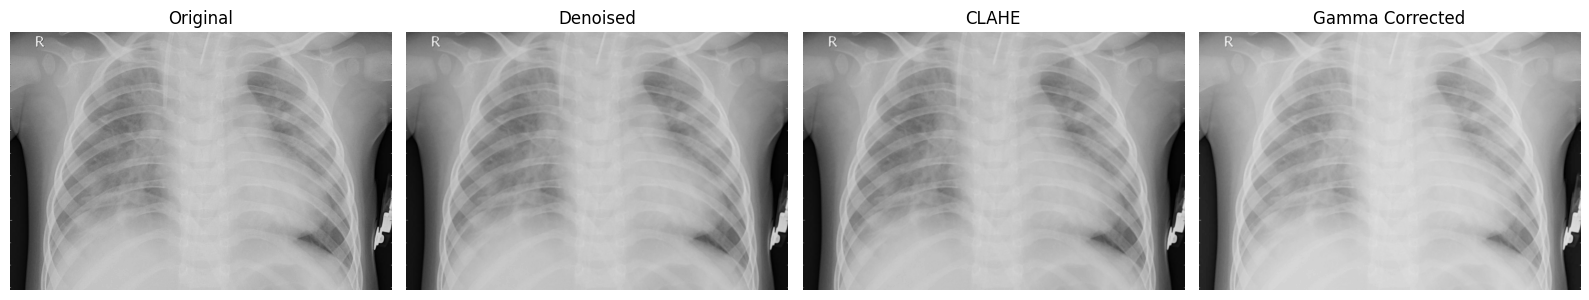

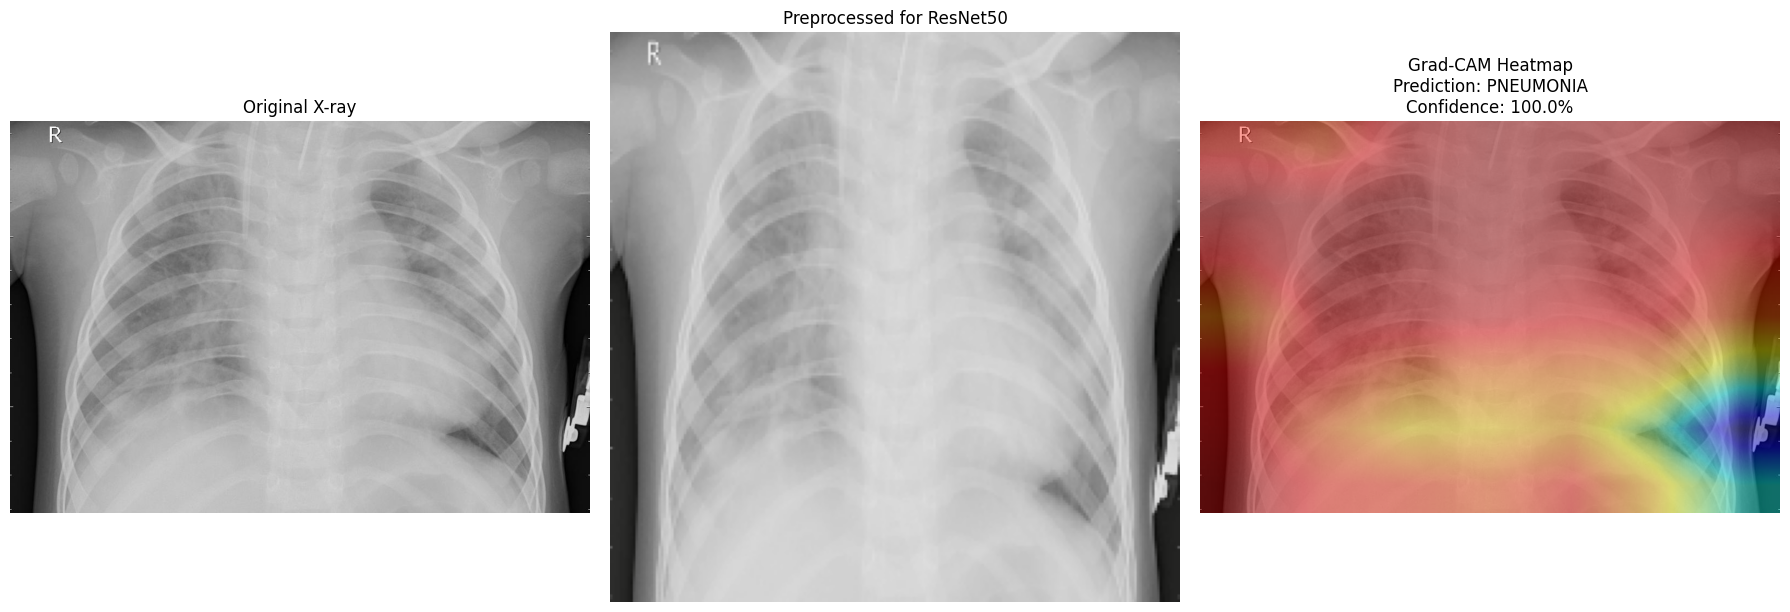


CLINICAL INTERPRETATION:
High confidence of pneumonia. Strong evidence of infection visible.

PREDICTION METRICS:
• Pneumonia Probability: 1.0000
• Normal Probability: 0.0000
• Confidence: 100.0%

Programmatic Access:
Class: PNEUMONIA
Heatmap shape: (224, 224)


In [26]:
# Make prediction
result = predict_with_gradcam(
    model,
    "/kaggle/input/chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg", visualize_preprocessing=True
)

# Visualize results
visualize_results(result)

# Access results programmatically
if 'error' not in result:
    print("\nProgrammatic Access:")
    print(f"Class: {result['predicted_class']}")
    print(f"Heatmap shape: {result['heatmap'].shape}")

# Explanation of the Evaluation Section

This section describes a comprehensive evaluation pipeline for a trained deep learning model using a test data generator. It is designed to calculate various performance metrics, generate detailed visualizations, and print summary reports to thoroughly analyze the model's performance.

---

## Overview

The evaluation process includes the following main steps:

1. **Obtaining Ground Truth and Predictions:**  
   The true labels and filenames are extracted from the test data generator. The model then predicts class probabilities on the test data in batches to efficiently handle large datasets.

2. **Calculating Performance Metrics:**  
   Multiple key metrics are calculated, including:  
   - Confusion Matrix  
   - Classification Report (precision, recall, F1-score)  
   - ROC Curve and Area Under the Curve (AUC)  
   - Precision-Recall Curve and AUC  
   - Accuracy, Sensitivity (Recall for Pneumonia), Specificity (Recall for Normal)  
   - Weighted F1 Score

3. **Organizing Predictions:**  
   A results DataFrame is created, mapping filenames with their true labels, predicted scores (probabilities), and predicted classes (based on a 0.5 threshold).

4. **Generating Visualizations:**  
   Multiple plots are created to visually inspect model performance and behavior:  
   - Normalized Confusion Matrix heatmap  
   - ROC curve with AUC  
   - Precision-Recall curve with AUC  
   - Distribution of prediction scores by true class  
   - Confidence score distribution per class  
   - Analysis of error types (false positives and false negatives)  
   - Threshold sensitivity analysis showing how performance metrics vary with decision threshold  
   - Class distribution in the test dataset  
   - Relationship between prediction confidence and accuracy (calibration analysis)

5. **Printing a Comprehensive Report:**  
   A textual summary is printed with detailed classification metrics and key performance indicators, providing an at-a-glance understanding of model quality.

---

## Purpose and Benefits

- **Comprehensive Evaluation:** The pipeline goes beyond simple accuracy by incorporating many performance metrics, including ROC and Precision-Recall analysis, which are essential for imbalanced classification tasks like pneumonia detection.

- **Visual Insights:** Graphical plots help interpret how confident the model is, where it makes errors, and how changes to classification thresholds affect outcomes.

- **Reproducibility:** Using the test generator with `shuffle=False` ensures consistent ordering of samples and correct alignment between predictions and ground truth labels.

- **Scalability:** Batch-wise predictions and progress tracking allow efficient evaluation on large test datasets.

---

## Usage Context

This evaluation setup is particularly useful for medical image classification tasks such as pneumonia detection on chest X-rays, where:

- False negatives (missing pneumonia) have severe consequences.  
- Model confidence calibration is important for clinical trust.  
- Detailed error analysis guides further model improvements and validation.

---

In summary, this evaluation section provides a robust framework to quantitatively and visually assess the performance of a pneumonia detection model on unseen test data, facilitating informed decision-making about model readiness and areas for refinement.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report, 
                           roc_curve, auc, precision_recall_curve)
from tqdm import tqdm

def evaluate_model_with_generator(model, test_generator):
    """
    Evaluate model performance using a test generator with comprehensive metrics and visualizations.
    
    Args:
        model: Trained Keras model
        test_generator: Test data generator (should have shuffle=False)
    
    Returns:
        Dictionary containing evaluation metrics and DataFrames
    """
    # 1. Get true labels and make predictions
    test_generator.reset()
    y_true = test_generator.classes
    filenames = test_generator.filenames
    
    # Initialize prediction storage
    y_scores = []
    y_pred = []
    
    # Predict in batches to handle large datasets
    for i in tqdm(range(len(test_generator)), desc="Evaluating batches"):
        X_batch, y_batch = test_generator[i]
        batch_scores = model.predict(X_batch, verbose=0).flatten()
        y_scores.extend(batch_scores)
        y_pred.extend((batch_scores > 0.5).astype(int))
    
    y_scores = np.array(y_scores)
    y_pred = np.array(y_pred)
    
    # 2. Calculate metrics
    metrics = calculate_metrics(y_true, y_pred, y_scores)
    
    # 3. Create results DataFrame
    results_df = pd.DataFrame({
        'filename': filenames,
        'true_class': ['PNEUMONIA' if x == 1 else 'NORMAL' for x in y_true],
        'pred_score': y_scores,
        'pred_class': ['PNEUMONIA' if x > 0.5 else 'NORMAL' for x in y_scores]
    })
    
    # 4. Generate visualizations
    generate_performance_visualizations(y_true, y_pred, y_scores, metrics)
    
    # 5. Print comprehensive report
    print_performance_report(metrics)
    
    return {
        'metrics': metrics,
        'predictions': results_df,
        'y_true': y_true,
        'y_scores': y_scores
    }

def calculate_metrics(y_true, y_pred, y_scores):
    """Calculate comprehensive performance metrics."""
    # Basic classification metrics
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA'], output_dict=True)
    
    # ROC curve metrics
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall metrics
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    
    # Additional metrics
    accuracy = np.mean(y_true == y_pred)
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])  # Recall for Pneumonia
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])  # Recall for Normal
    
    return {
        'confusion_matrix': cm,
        'classification_report': cr,
        'roc_curve': {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc},
        'pr_curve': {'precision': precision, 'recall': recall, 'auc': pr_auc},
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'f1_score': cr['weighted avg']['f1-score']
    }

def generate_performance_visualizations(y_true, y_pred, y_scores, metrics):
    """Generate comprehensive performance visualizations with additional charts."""
    plt.figure(figsize=(24, 20))
    
    # 1. Confusion Matrix (Normalized)
    plt.subplot(3, 3, 1)
    cm_normalized = metrics['confusion_matrix'] / metrics['confusion_matrix'].sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
               xticklabels=['NORMAL', 'PNEUMONIA'], 
               yticklabels=['NORMAL', 'PNEUMONIA'])
    plt.title('Normalized Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # 2. ROC Curve
    plt.subplot(3, 3, 2)
    plt.plot(metrics['roc_curve']['fpr'], metrics['roc_curve']['tpr'], 
            label=f'ROC Curve (AUC = {metrics["roc_curve"]["auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    
    # 3. Precision-Recall Curve
    plt.subplot(3, 3, 3)
    plt.plot(metrics['pr_curve']['recall'], metrics['pr_curve']['precision'],
            label=f'PR Curve (AUC = {metrics["pr_curve"]["auc"]:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Precision-Recall Curve', fontsize=14)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower left")
    
    # 4. Prediction Distribution
    plt.subplot(3, 3, 4)
    plot_data = pd.DataFrame({
        'score': y_scores,
        'class': ['Pneumonia' if x == 1 else 'Normal' for x in y_true]
    })
    sns.histplot(data=plot_data, x='score', hue='class', bins=20, 
                kde=True, palette={'Normal': 'green', 'Pneumonia': 'red'},
                element='step')
    plt.axvline(x=0.5, color='black', linestyle='--', label='Decision Threshold')
    plt.title('Prediction Score Distribution', fontsize=14)
    plt.xlabel('Prediction Score (Pneumonia Probability)')
    plt.ylabel('Count')
    plt.legend()
    
    # 5. Confidence Distribution by Class (NEW)
    plt.subplot(3, 3, 5)
    sns.boxplot(data=plot_data, x='class', y='score', palette={'Normal': 'green', 'Pneumonia': 'red'})
    plt.axhline(y=0.5, color='black', linestyle='--')
    plt.title('Confidence Distribution by True Class', fontsize=14)
    plt.xlabel('True Class')
    plt.ylabel('Prediction Score')
    
    # 6. Error Analysis (NEW)
    plt.subplot(3, 3, 6)
    error_types = {
        'False Positive': ((y_pred == 1) & (y_true == 0)).sum(),
        'False Negative': ((y_pred == 0) & (y_true == 1)).sum()
    }
    plt.bar(error_types.keys(), error_types.values(), color=['orange', 'purple'])
    plt.title('Error Type Distribution', fontsize=14)
    plt.ylabel('Count')
    
    # 7. Threshold Analysis (NEW)
    plt.subplot(3, 3, 7)
    thresholds = np.linspace(0, 1, 50)
    fprs = []
    tprs = []
    for thresh in thresholds:
        y_pred_thresh = (y_scores > thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_thresh).ravel()
        fprs.append(fp / (fp + tn))
        tprs.append(tp / (tp + fn))
    plt.plot(thresholds, tprs, label='True Positive Rate')
    plt.plot(thresholds, fprs, label='False Positive Rate')
    plt.axvline(x=0.5, color='black', linestyle='--', label='Default Threshold')
    plt.title('Threshold Analysis', fontsize=14)
    plt.xlabel('Decision Threshold')
    plt.ylabel('Rate')
    plt.legend()
    
    # 8. Class Balance (NEW)
    plt.subplot(3, 3, 8)
    class_counts = pd.Series(y_true).value_counts().rename(index={0: 'Normal', 1: 'Pneumonia'})
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', 
            colors=['green', 'red'], startangle=90)
    plt.title('Class Distribution in Test Set', fontsize=14)
    
    # 9. Confidence vs Accuracy (NEW)
    plt.subplot(3, 3, 9)
    bins = np.linspace(0, 1, 11)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    accuracy_per_bin = []
    for i in range(len(bins)-1):
        mask = (y_scores >= bins[i]) & (y_scores < bins[i+1])
        if mask.sum() > 0:
            accuracy = (y_true[mask] == y_pred[mask]).mean()
            accuracy_per_bin.append(accuracy)
        else:
            accuracy_per_bin.append(0)
    plt.plot(bin_centers, accuracy_per_bin, marker='o')
    plt.axhline(y=metrics['accuracy'], color='r', linestyle='--', label='Overall Accuracy')
    plt.title('Confidence vs Accuracy', fontsize=14)
    plt.xlabel('Prediction Score Bin')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.suptitle('Comprehensive Pneumonia Detection Model Evaluation', fontsize=18, y=1.02)
    plt.show()

def print_performance_report(metrics):
    """Print comprehensive performance report."""
    print("\n" + "="*80)
    print("PNEUMONIA DETECTION MODEL PERFORMANCE EVALUATION".center(80))
    print("="*80)
    
    print("\nCLASSIFICATION REPORT:")
    print(pd.DataFrame(metrics['classification_report']).transpose().round(2))
    
    print("\nKEY METRICS:")
    print(f"- Accuracy: {metrics['accuracy']:.3f}")
    print(f"- Sensitivity (Recall for Pneumonia): {metrics['sensitivity']:.3f}")
    print(f"- Specificity (Recall for Normal): {metrics['specificity']:.3f}")
    print(f"- F1 Score: {metrics['f1_score']:.3f}")
    print(f"- ROC AUC: {metrics['roc_curve']['auc']:.3f}")
    print(f"- PR AUC: {metrics['pr_curve']['auc']:.3f}")
    
    print("\n" + "="*80)

# Usage example:
# test_generator = val_test_datagen.flow_from_directory(...)
# evaluation_results = evaluate_model_with_generator(model, test_generator)

Found 1172 images belonging to 2 classes.


Evaluating batches: 100%|██████████| 37/37 [00:14<00:00,  2.59it/s]
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_

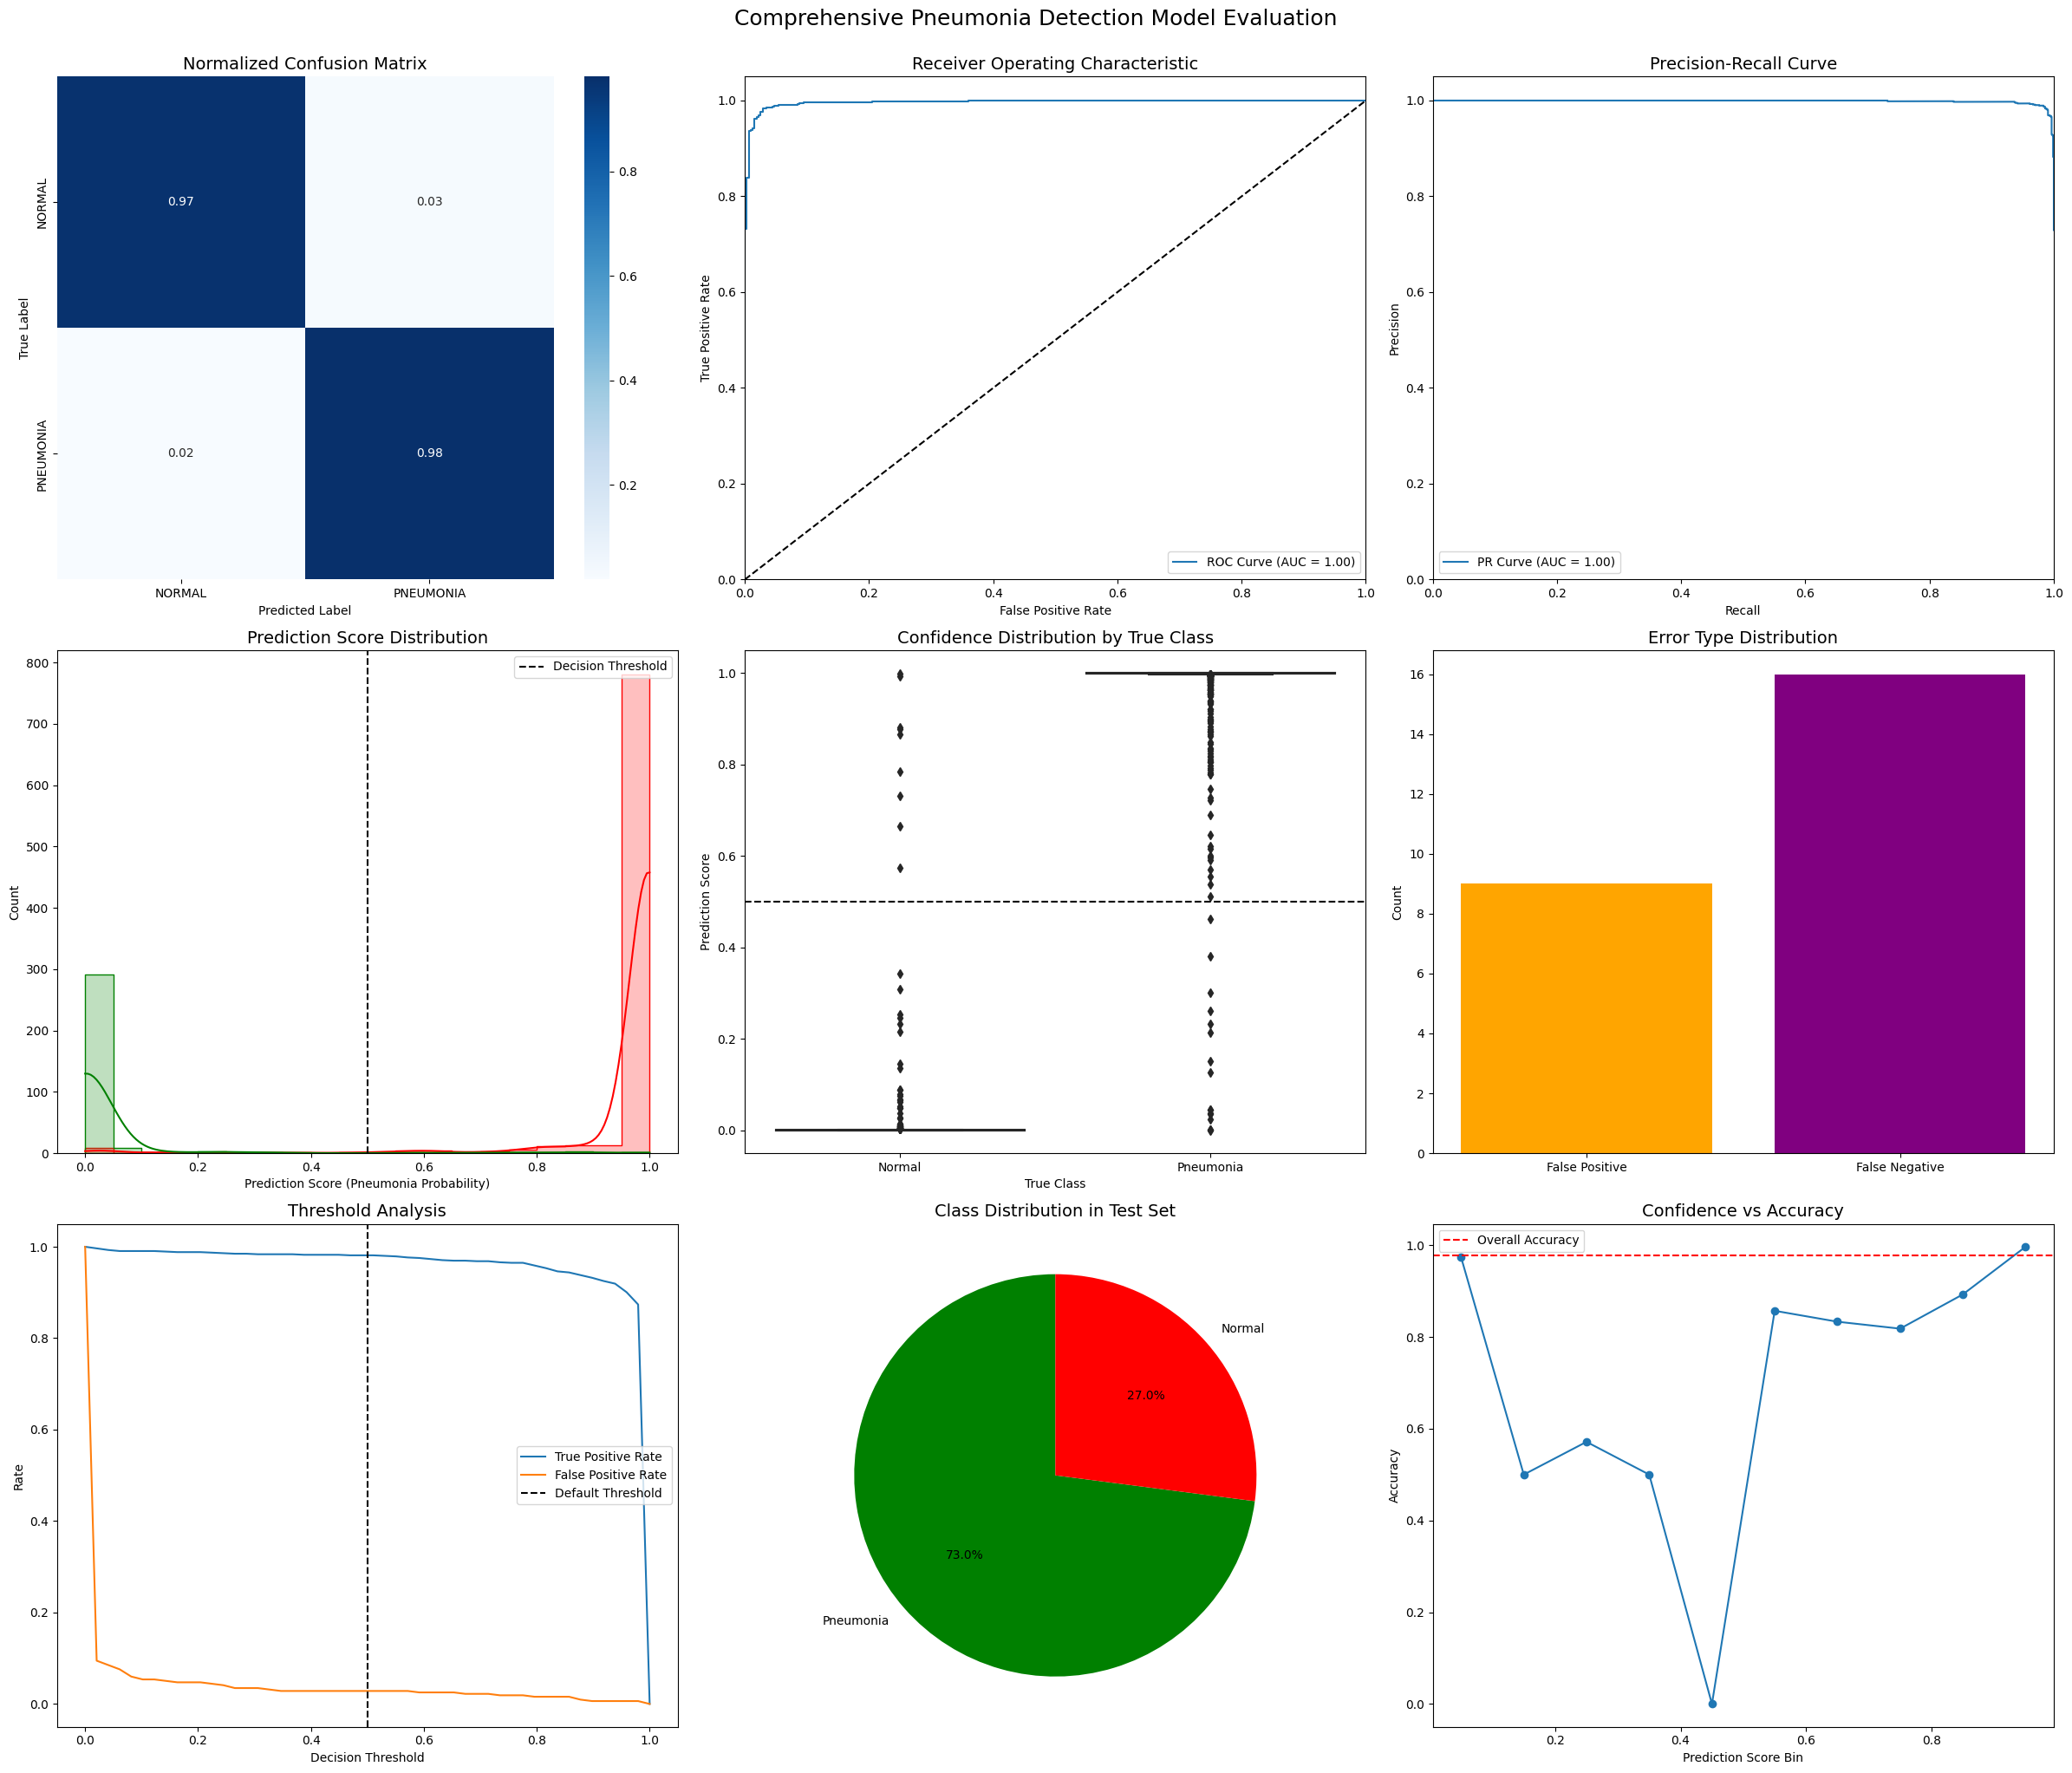


                PNEUMONIA DETECTION MODEL PERFORMANCE EVALUATION                

CLASSIFICATION REPORT:
              precision  recall  f1-score  support
NORMAL             0.95    0.97      0.96   317.00
PNEUMONIA          0.99    0.98      0.99   855.00
accuracy           0.98    0.98      0.98     0.98
macro avg          0.97    0.98      0.97  1172.00
weighted avg       0.98    0.98      0.98  1172.00

KEY METRICS:
- Accuracy: 0.979
- Sensitivity (Recall for Pneumonia): 0.981
- Specificity (Recall for Normal): 0.972
- F1 Score: 0.979
- ROC AUC: 0.996
- PR AUC: 0.999

0.9786689419795221
              filename true_class    pred_score pred_class
0  NORMAL/img_1006.jpg     NORMAL  7.238584e-06     NORMAL
1  NORMAL/img_1008.jpg     NORMAL  2.418348e-04     NORMAL
2  NORMAL/img_1011.jpg     NORMAL  1.118095e-06     NORMAL
3  NORMAL/img_1012.jpg     NORMAL  5.850443e-06     NORMAL
4  NORMAL/img_1016.jpg     NORMAL  9.975561e-08     NORMAL


In [28]:
# Create your test generator (make sure shuffle=False)
test_generator = val_test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

# Evaluate model
evaluation_results = evaluate_model_with_generator(model, test_generator)

# Access results:
print(evaluation_results['metrics']['accuracy'])  # Overall accuracy
print(evaluation_results['predictions'].head())   # Individual predictions

In [29]:
# Save the model and weights
model.save('pneumonia1_resnet50_model2.h5')
model.save_weights('pneumonia1_resnet50_weights2.weights.h5')
print("Model and weights saved.")

Model and weights saved.


In [30]:
from IPython.display import FileLink
FileLink('pneumonia1_resnet50_model2.h5')  # Click the link to download

/kaggle/working/pneumonia1_resnet50_model2.h5

In [31]:
from IPython.display import FileLink
FileLink('pneumonia1_resnet50_weights2.weights.h5')

/kaggle/working/pneumonia1_resnet50_weights2.weights.h5

In [32]:
from IPython.display import FileLink
FileLink('best_model.keras')

/kaggle/working/best_model.keras